<div id="container" style="position:relative;">
<div style="float:left"><h1>  

# Project: Deliverable - Mental Health Predictor - BrainStation

## EDA

#### Author: Gennaro Costantino

#### Contact: guillarogennaro@gmail.com

#### Date: Aug-Sep, 2024
    
</h1></div>

<div style="position:relative; float:right">
  <img style="height:130px" src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*lzX0I82X916EpWbhTPiPJg.png"/>
</div>
    

# Steps:

1. [Step 1: Data Loading & Cleaning](#step1)
2. [Step 2: EDA](#step2)


# Step 1: Data Loading & Cleaning <a class="anchor" id="step1"></a>
## Table of Contents
---
1. [Project Overview](#introduction)
2. [Key Questions](#keyquestions)
3. [Methods Used for Analysis](#methods)
    -[Loading Libraries](#libs)
4. [Data Set](#dataset)
    - [Data Dictionary](#dict)
5. [Initial Data Cleaning](#cleaning)
    - [Plan of Action](#action)
    - [Data Loading](#load)
    - [Data Assessment](#assess)
    - [Handling Missing Values](#missing)
6. [Findings Summary](#findings)
    - [Next Steps](#next)

## Project Overview <a class="anchor" id="introduction"></a>
---

### Depression Data Analysis

This project focuses on analyzing a dataset related to personal and lifestyle attributes to explore potential risk factors for depression. The aim is to understand how various factors such as age, lifestyle habits, and medical history may contribute to mental health outcomes. By analyzing these data points, we hope to identify patterns and correlations that could inform future research or intervention strategies.

### Key Objectives
- Identify Risk Factors: Determine the most common attributes associated with depression.
- Correlate Lifestyle Choices: Explore how lifestyle choices (e.g., smoking, physical activity, diet) relate to mental health.
- Predictive Modeling: Develop models that can predict the likelihood of depression based on personal and lifestyle attributes.thout the need to read the code.

## Key Questions <a class="anchor" id="keyquestions"></a>
---

- What are the common risk factors associated with depression?
- How do lifestyle choices, such as smoking and physical activity, correlate with mental health outcomes?
- Can we predict the likelihood of depression based on these attributes?

## Methods Used for Analysis <a class="anchor" id="methods"></a>
---

- Exploratory Data Analysis (EDA): To uncover patterns, trends, and relationships in the data.
- Data Preprocessing: For cleaning and preparing the data for analysis.
- Predictive Modeling: To develop and evaluate models that predict depression risk.
- Evaluation Metrics: To measure the performance of the models and validate findings.

I used `Python 3` in `Jupyter Lab` and its associated libraries:
 - Pandas
- Matplotlib
- Ploty
- Numpy
- Seasborn
- Matplotlib 
- Scipy
- Sklearn

We will load necesssary libraries below. More libraries will be loaded as needed for analysis.

## Loading the Necessary Libraries<a class="anchor" id="load"></a>
---

In [18]:
#load the necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import string
import nltk

# Downloading the WordNet corpus
nltk.download('wordnet')

from scipy import stats
from scipy.stats import norm, chi2_contingency, f_oneway

#filter warnings
from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #Lemmatization: Converts a word to its root form based on its meaning.
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize, LabelEncoder  
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score 
from sklearn.svm import SVC 
from sklearn.multiclass import OneVsOneClassifier 
from sklearn.calibration import CalibratedClassifierCV
from tempfile import mkdtemp 
from sklearn.decomposition import KernelPCA, PCA
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Set <a class="anchor" id="dataset"></a>
---
The dataset consists of 413,768 records and 16 attributes, each representing various personal and lifestyle characteristics of individuals. The dataset aims to provide a comprehensive overview of factors that may influence mental health, particularly focusing on aspects related to depression. The attributes include demographic information (e.g., age, marital status, education), lifestyle factors (e.g., smoking status, physical activity level, alcohol consumption), and medical history (e.g., history of mental illness, substance abuse, chronic medical conditions).


### Data Dictionary <a class="anchor" id="dict"></a>

To help with the analysis, study the data dictionary below.

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Description</th>
  </tr>
  <tr>
    <td>Name</td>
    <td>The name of the individual (anonymized for privacy).</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>The age of the individual (in years).</td>
  </tr>
  <tr>
    <td>Marital Status</td>
    <td>The marital status (e.g., Single, Married, Divorced, Widowed).</td>
  </tr>
  <tr>
    <td>Education Level</td>
    <td>The highest level of education attained (e.g., High School, Bachelor's, Master's).</td>
  </tr>
  <tr>
    <td>Number of Children</td>
    <td>The number of children the individual has.</td>
  </tr>
  <tr>
    <td>Smoking Status</td>
    <td>Indicates whether the individual is a smoker or non-smoker.</td>
  </tr>
  <tr>
    <td>Physical Activity Level</td>
    <td>The level of physical activity (e.g., Sedentary, Moderate, Active).</td>
  </tr>
  <tr>
    <td>Employment Status</td>
    <td>Employment status (e.g., Employed, Unemployed, Retired).</td>
  </tr>
  <tr>
    <td>Income</td>
    <td>Annual income of the individual (in USD).</td>
  </tr>
  <tr>
    <td>Alcohol Consumption</td>
    <td>Level of alcohol consumption (e.g., Low, Moderate, High).</td>
  </tr>
  <tr>
    <td>Dietary Habits</td>
    <td>Indicates the dietary habits (e.g., Healthy, Moderate, Unhealthy).</td>
  </tr>
  <tr>
    <td>Sleep Patterns</td>
    <td>Quality of sleep (e.g., Good, Fair, Poor).</td>
  </tr>
  <tr>
    <td>History of Mental Illness</td>
    <td>Whether the individual has a history of mental health issues (Yes/No).</td>
  </tr>
  <tr>
    <td>History of Substance Abuse</td>
    <td>Indicates if there is a history of substance abuse (Yes/No).</td>
  </tr>
  <tr>
    <td>Family History of Depression</td>
    <td>Indicates if there is a family history of depression (Yes/No).</td>
  </tr>
  <tr>
    <td>Chronic Medical Conditions</td>
    <td>Whether the individual has chronic medical conditions (Yes/No).</td>
  </tr>
</table>


## Initial Data Cleaning <a class="anchor" id="cleaning"></a>
---


### Plan of action <a class="anchor" id="action"></a>

1. Data Loading
2. Initial Data Assessment
2. Data Cleaning
    - Dealing with duplicated values
    - Dealing with redundant columns
    - Dealing with null values
3. EDA 
4. Draw insights
5. Formulate a conclusion

### Data Loading <a class="anchor" id="load"></a>
---

In [25]:
# Reading the CSV file downloaded from Kaggle
df = pd.read_csv(r'C:\Users\User\Documents\Brain Station\Data Science\Capstone\Capstone_Project_Depression Data Analysis\data\depression_data.csv')

In [26]:
# New DF 
df.head(4)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No


### Data Assesment <a class="anchor" id="assess"></a>
---

First lets take a look at the number of rows and columns in this data set

In [29]:
# Check the shape of the data:
df.shape

(413768, 16)

In [30]:
# Checking the value counts from our target
df['History of Mental Illness'].value_counts()

History of Mental Illness
No     287943
Yes    125825
Name: count, dtype: int64

**Observations:** 

The dataset contains 413,768 entries and 16 columns.

---


Next let familiarize ourselves with the data by checking th information contained in the data set.

Next Steps:
- Check data types and formats
- Check data types Date column (transfor obejct to date format)
- Check for duplicates
- Check missing data

---

In [34]:
df.info() # There is no nan values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

**Observations:**

This data set contains the following data types:

- `float64`(1)
- `int64`(2)
- `obect`(13)

There seems to not be columns with null values.

---

Next we will take a look at the number duplicate rows in the dataframe

In [37]:
# Check the number of duplicated rows. There are no duplicate rows in the dataset.
df.duplicated().sum()

0

In [38]:
# Identify all rows that are duplicated including their first occurrences
duplicate_rows_with_original = df[df.duplicated(keep=False)]

# Display the first two sets of duplicated rows with their original counterparts
duplicate_rows_with_original.head(4)  # showing both original and duplicated rows


,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions


**Observations:**

No duplicate entries were found.

---


Next we will take a look if any columns are duplicated by transposing the dataframe and running the duplicated function from above.

In [41]:
# Transpose the data frame and then look for duplicated rows to determine if any of the columns are duplicated:
#df.T.duplicated().sum() # this will take time to run!

**Observations:**

There is no duplicated columns in this data frame. 

---

### Handling Missing Values <a class="anchor" id="missing"></a>

In [44]:
# Checking for missing values in each column. There are no missing values in the dataset. 
missing_values = df.isnull().sum()
print(missing_values)

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


In [45]:
#check for missing values:
null_counts = df.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls
#lets take a look at the percentage of the data that these nulls make up
percentage_nulls = columns_with_nulls/df.shape[0]*100
percentage_nulls

Series([], dtype: float64)

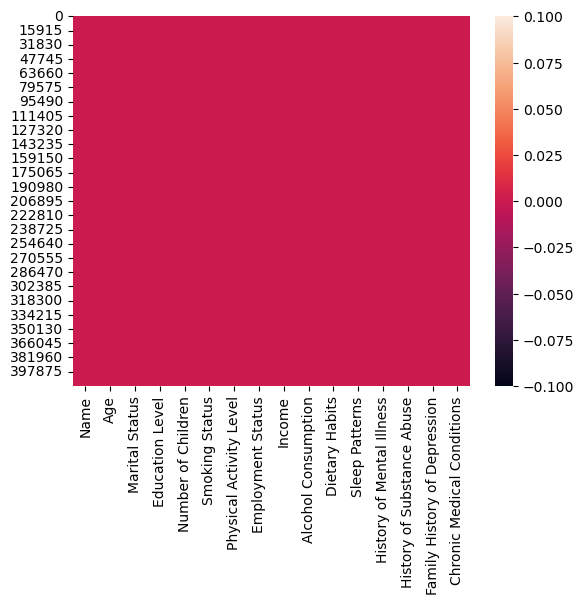

In [46]:
# Visualize missing data using a heatmap
sns.heatmap(df.isnull())
plt.show()

**Observations:**

There is no missing values.

---

## Finding Summary <a class="anchor" id="findings"></a>

The data has been assessed and cleaned by performing the following steps:

- Checking for duplicated
- Checking redundant or insignificant rows
- Checking columns with a high proportion of null values
- Converting date datatype to date format

Before we move forward let's create a copy of our df:

In [49]:
df_2 = df.copy()

In [50]:
# For sanity lets check the DF info and see if the total rows decreased by 539. Total should be 515199

In [51]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

## Understanding the Categorical Data Type for Future Analysis:

In [53]:
# Displaing the distribution of categorical columns:
for column in df_2.select_dtypes(include=['object']).columns:
    print(df_2[column].value_counts())

Name
Michael Smith      198
Michael Johnson    147
David Smith        131
Robert Smith       128
David Johnson      126
                  ... 
Corey Moore          1
Carl Ballard         1
Carla Mcgrath        1
Cory Wise            1
Gary Faulkner        1
Name: count, Length: 196851, dtype: int64
Marital Status
Married     240444
Single       72110
Widowed      68485
Divorced     32729
Name: count, dtype: int64
Education Level
Bachelor's Degree    124329
High School          118927
Associate Degree      79999
Master's Degree       73768
PhD                   16745
Name: count, dtype: int64
Smoking Status
Non-smoker    247416
Former        116184
Current        50168
Name: count, dtype: int64
Physical Activity Level
Sedentary    176850
Moderate     158013
Active        78905
Name: count, dtype: int64
Employment Status
Employed      265659
Unemployed    148109
Name: count, dtype: int64
Alcohol Consumption
Moderate    173440
Low         139250
High        101078
Name: count, dtype: int6

In [54]:
# Check for unique values in each categorical column to identify inconsistencies
unique_values = {column: df_2[column].unique() for column in df_2.select_dtypes(include=['object']).columns}

# Display the results for review
unique_values

{'Name': array(['Christine Barker', 'Jacqueline Lewis', 'Shannon Church', ...,
        'Madeline Butler', 'Travis Brewer', 'Gary Faulkner'], dtype=object),
 'Marital Status': array(['Married', 'Widowed', 'Divorced', 'Single'], dtype=object),
 'Education Level': array(["Bachelor's Degree", 'High School', "Master's Degree",
        'Associate Degree', 'PhD'], dtype=object),
 'Smoking Status': array(['Non-smoker', 'Former', 'Current'], dtype=object),
 'Physical Activity Level': array(['Active', 'Sedentary', 'Moderate'], dtype=object),
 'Employment Status': array(['Unemployed', 'Employed'], dtype=object),
 'Alcohol Consumption': array(['Moderate', 'High', 'Low'], dtype=object),
 'Dietary Habits': array(['Moderate', 'Unhealthy', 'Healthy'], dtype=object),
 'Sleep Patterns': array(['Fair', 'Good', 'Poor'], dtype=object),
 'History of Mental Illness': array(['Yes', 'No'], dtype=object),
 'History of Substance Abuse': array(['No', 'Yes'], dtype=object),
 'Family History of Depression': array([

**Observations:**

The categorical columns have consistent and clear values, so no immediate corrections are needed. Here are the categories identified:

#### Possible Ordinal columns: 
- **Marital Status**: Married, Widowed, Divorced, Single
- **Education Level**: Bachelor's Degree, High School, Master's Degree, Associate Degree, PhD
- **Smoking Status**: Non-smoker, Former, Current
- **Physical Activity Level**: Active, Sedentary, Moderate
- **Employment Status**: Unemployed, Employed
- **Alcohol Consumption**: Moderate, High, Low
- **Dietary Habits**: Moderate, Unhealthy, Healthy
- **Sleep Patterns**: Fair, Good, Poor
  

#### Possible Binary columns:
- **History of Mental Illness**: Yes, No
- **History of Substance Abuse**: No, Yes
- **Family History of Depression**: Yes, No
- **Chronic Medical Conditions**: Yes, No

# Step 2: EDA <a class="anchor" id="step2"></a>
## Table of Contents
---
1. [Data Assessment](#assessment)
2. [EDA](#eda)
3. [Feature Engineering (First Iteration)](#fa) #possible create low/high seasonal (1,0) holidays (1,0), Delta
4. [EDA - with new DF](#eda2)
5. [Conclusions](#conclusions)

## Data Assessment <a class="anchor" id="assessment"></a>

In [58]:
#Lets take a look at the original statistical properties of the numerical columns
df_2.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


There are 3 numerical columns. The above shows a summary of core statistics for these columns:
- `Count`: Number of entries
- `Mean`: Average value down the colum
- `std`: The standard deviation
- `min`: The minimum value found in that column
- `Percentiles`: The upper, middle and lower percentile values of the data
- `max`: The max value of that column

## EDA <a class="anchor" id="eda"></a>

Lets split up the numerical and categorical columns for ease of EDA

In [62]:
numerical_columns = df_2.select_dtypes(include = ['int64', 'float64'])
categorical_columns = df_2.select_dtypes(include = ['object'])

First we are going to explore the numerical columns

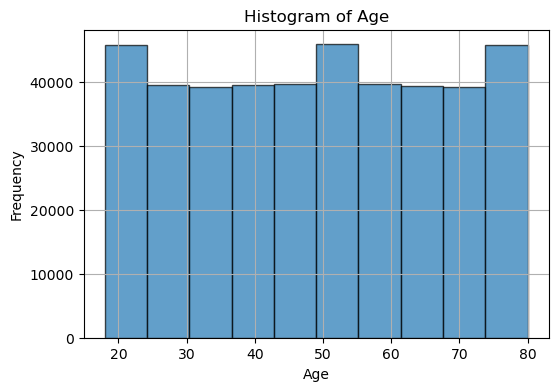

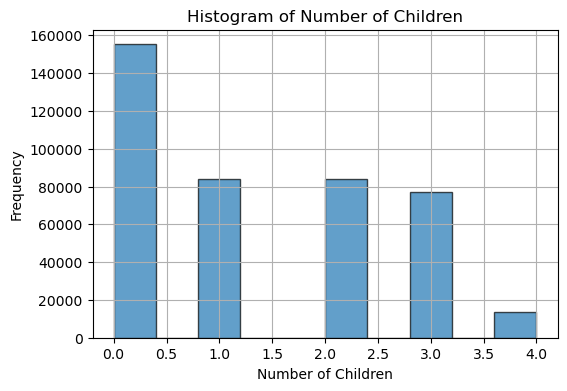

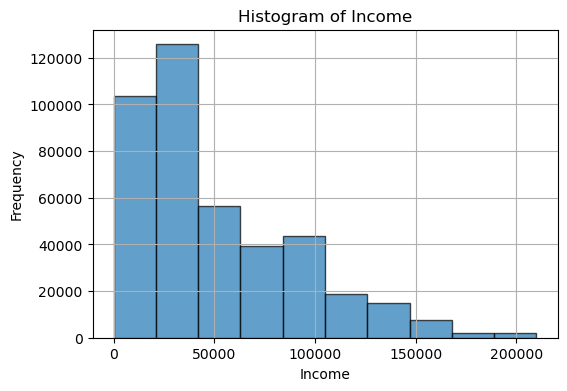

In [64]:
for column in numerical_columns.columns:
    plt.figure(figsize=(6, 4))  
    plt.hist(df_2[column], bins=10, edgecolor='k', alpha=0.7)  
    plt.title(f'Histogram of {column}') 
    plt.xlabel(column) 
    plt.ylabel('Frequency') 
    plt.grid(True)
    plt.show()  

Seaborn automatically calculates the optimal bin size. While the distributions are similar, this provides a clearer and more accurate visualization of the true distribution.

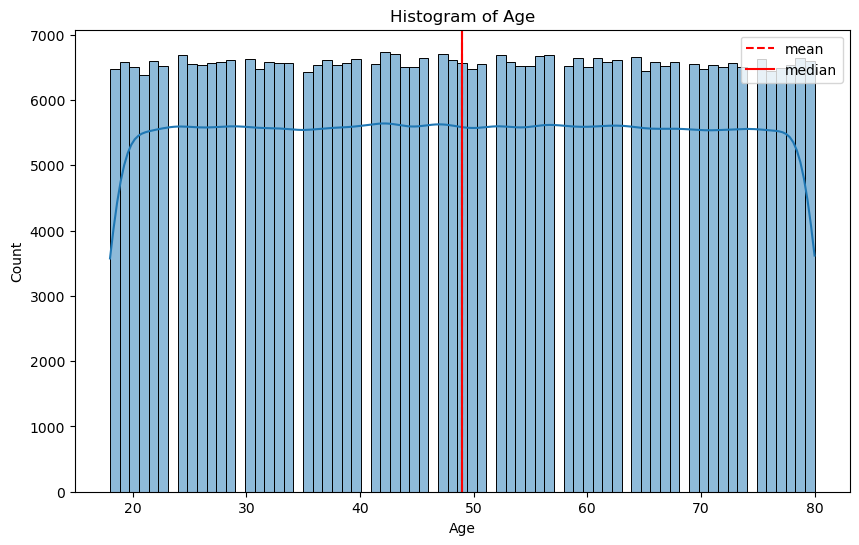

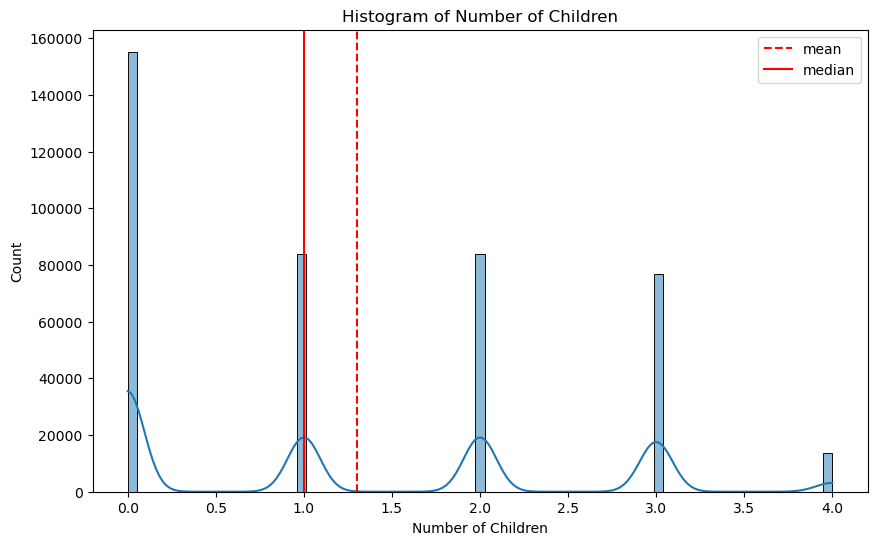

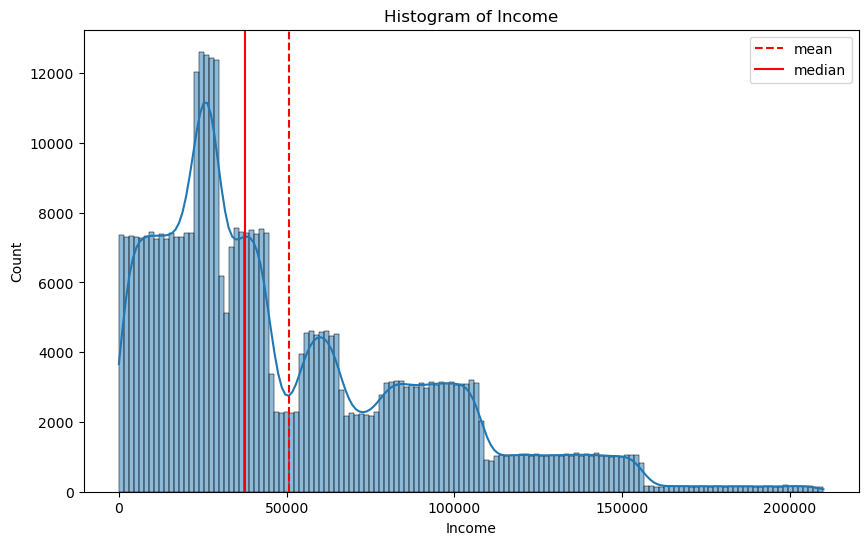

In [66]:
# another way to visualize using seaborn
for column in numerical_columns.columns:

    column_mean=df_2[column].mean()
    column_median=df_2[column].median()

# Plot a histogram of the numerical columns, with lines marking mean and median
###
    plt.figure(figsize=(10,6))
    sns.histplot(df_2[column], kde=True)
    plt.axvline(column_mean, label='mean',color='r',linestyle='--')
    plt.axvline(column_median, label='median', color='r')
    plt.title(f'Histogram of {column}')
    plt.legend()

    plt.show()


### Findings:

There are **3 numerical columns** for which we have plotted the histogram distributions above. Here are some notable observations:

1. **Age**:
   - The distribution of the `Age` column appears relatively balanced, centered around a mean and median of 49 years. There is no significant skew, suggesting a uniform spread of ages among individuals in the dataset.
   
2. **Number of Children**:
   - The `Number of Children` column is right-skewed, with most individuals having one or no children. This indicates that smaller family sizes are more common in the dataset, and a few individuals have larger numbers of children.

3. **Income**:
   - The `Income` column exhibits a right-skewed distribution. The majority of individuals have lower to moderate incomes, with the mean income being around 50,662 and the median at $37,520. This skew suggests that there are fewer individuals with higher incomes, which could affect the analysis, especially if income plays a significant role in predicting mental health outcomes.

These distributions help identify the patterns in the data and can guide the next steps in the analysis, such as handling skewed features, creating bins, or normalizing some of the skewed data. These actions may help improve the performance of predictive models and enable more effective exploratory analysis. 

Lets now take a look at the categorical columns

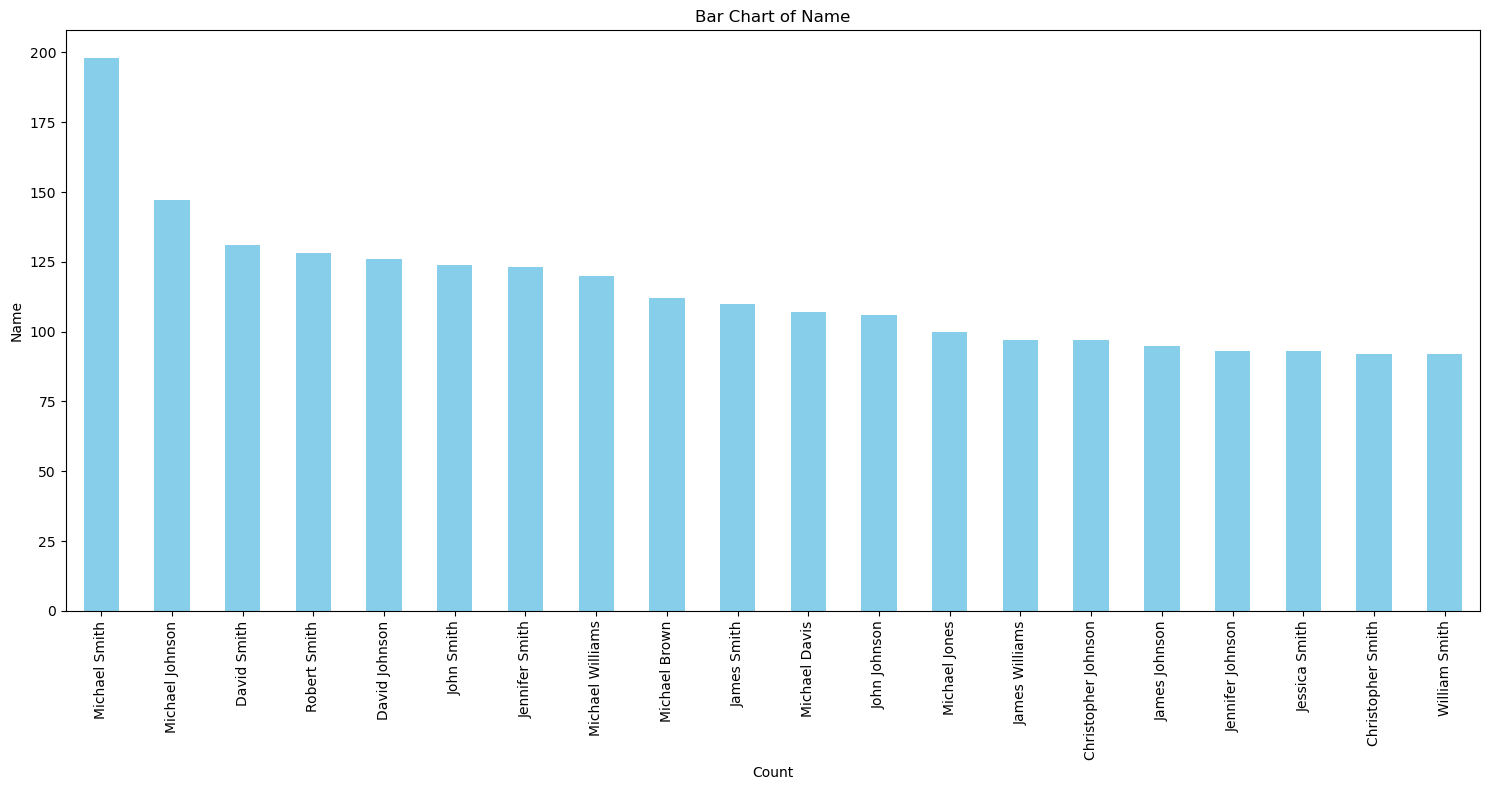

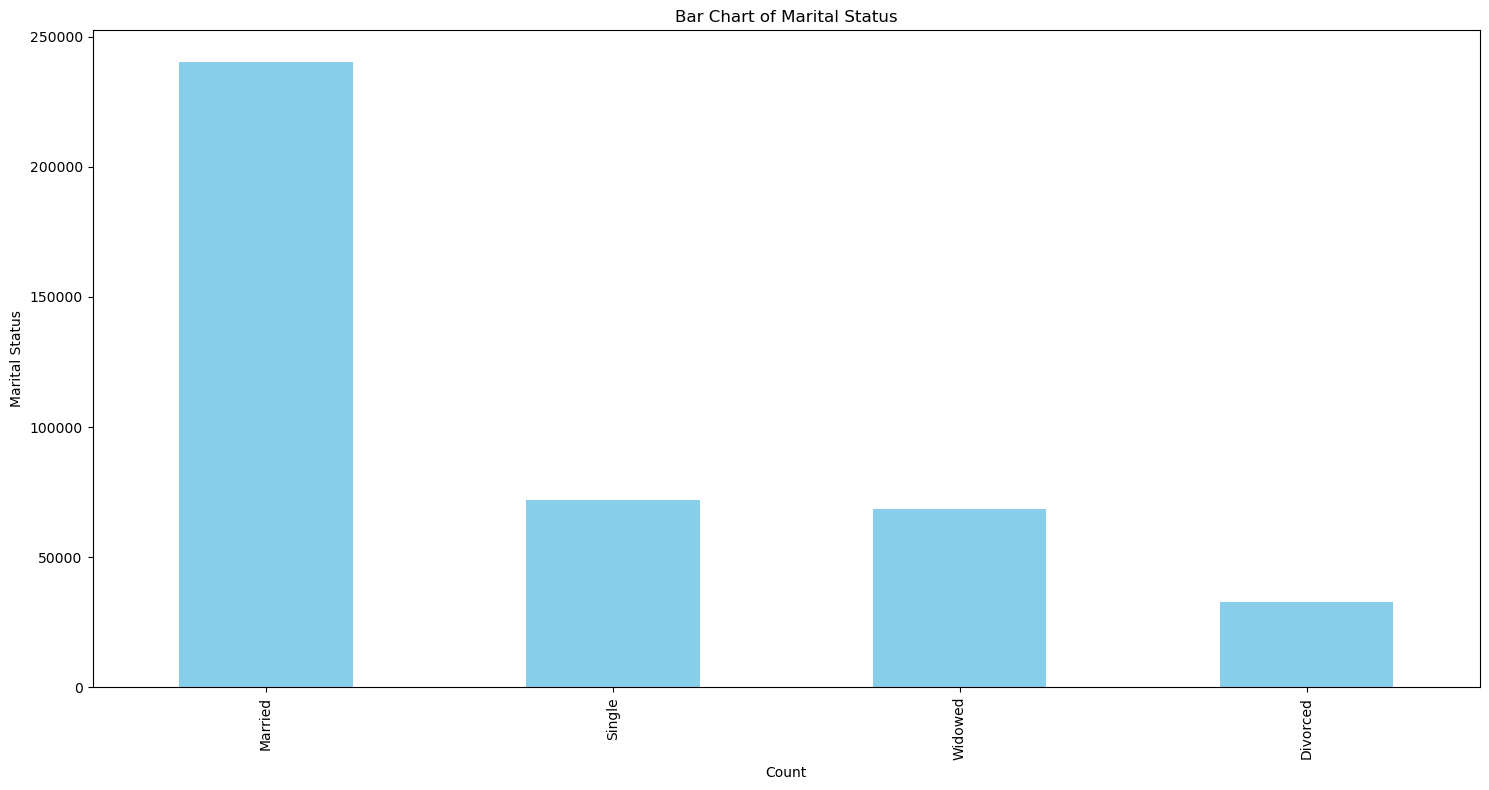

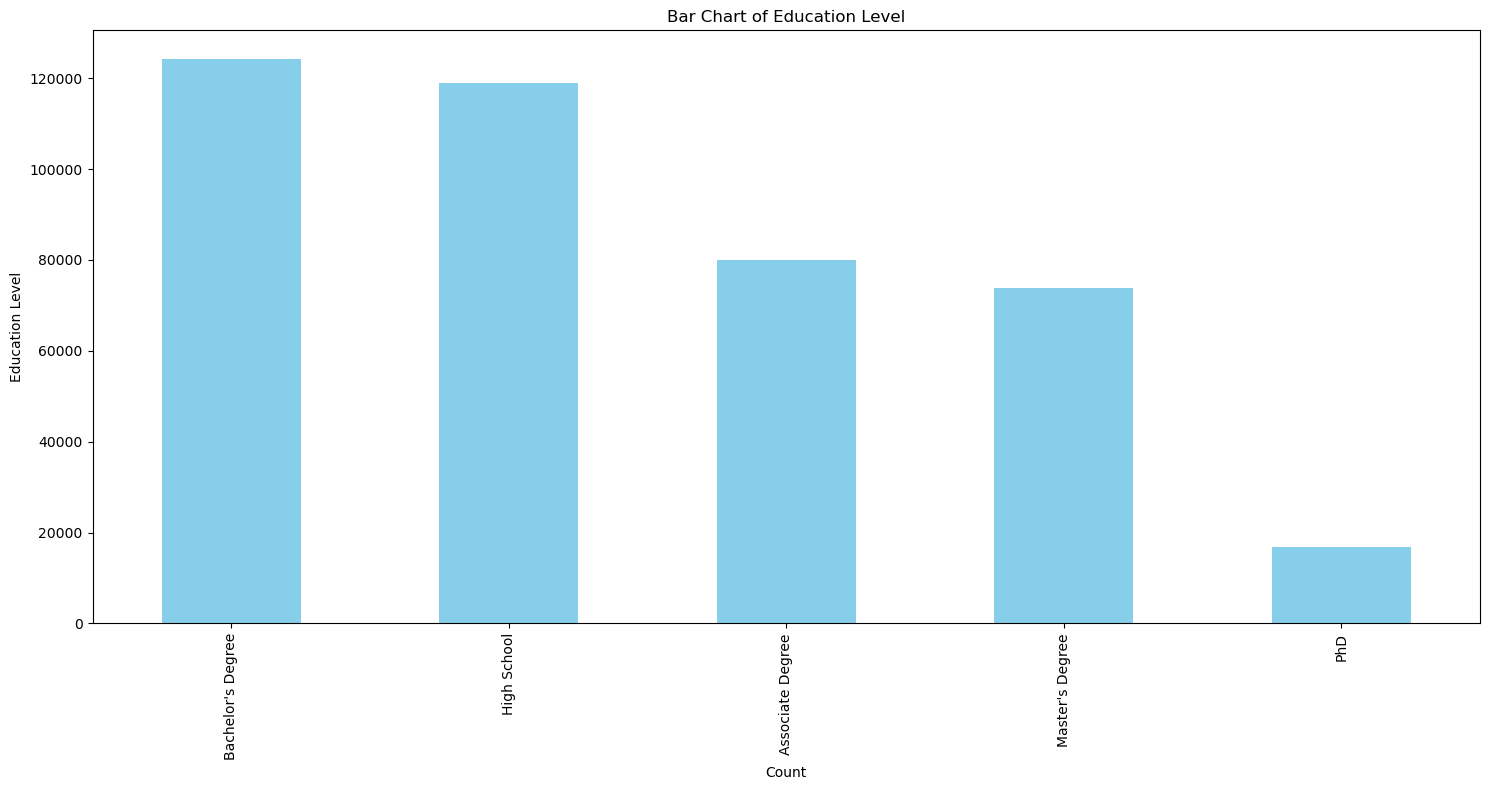

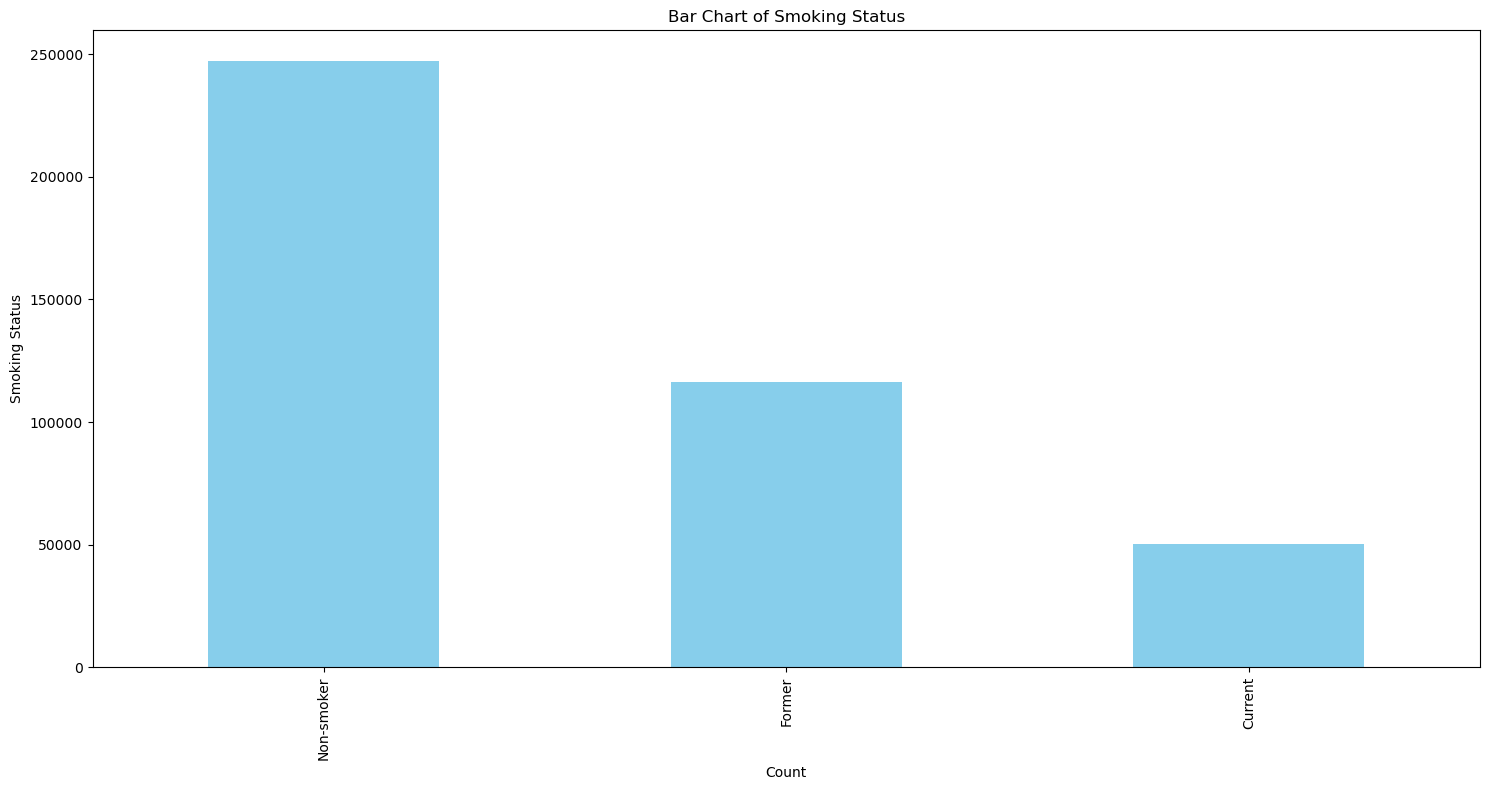

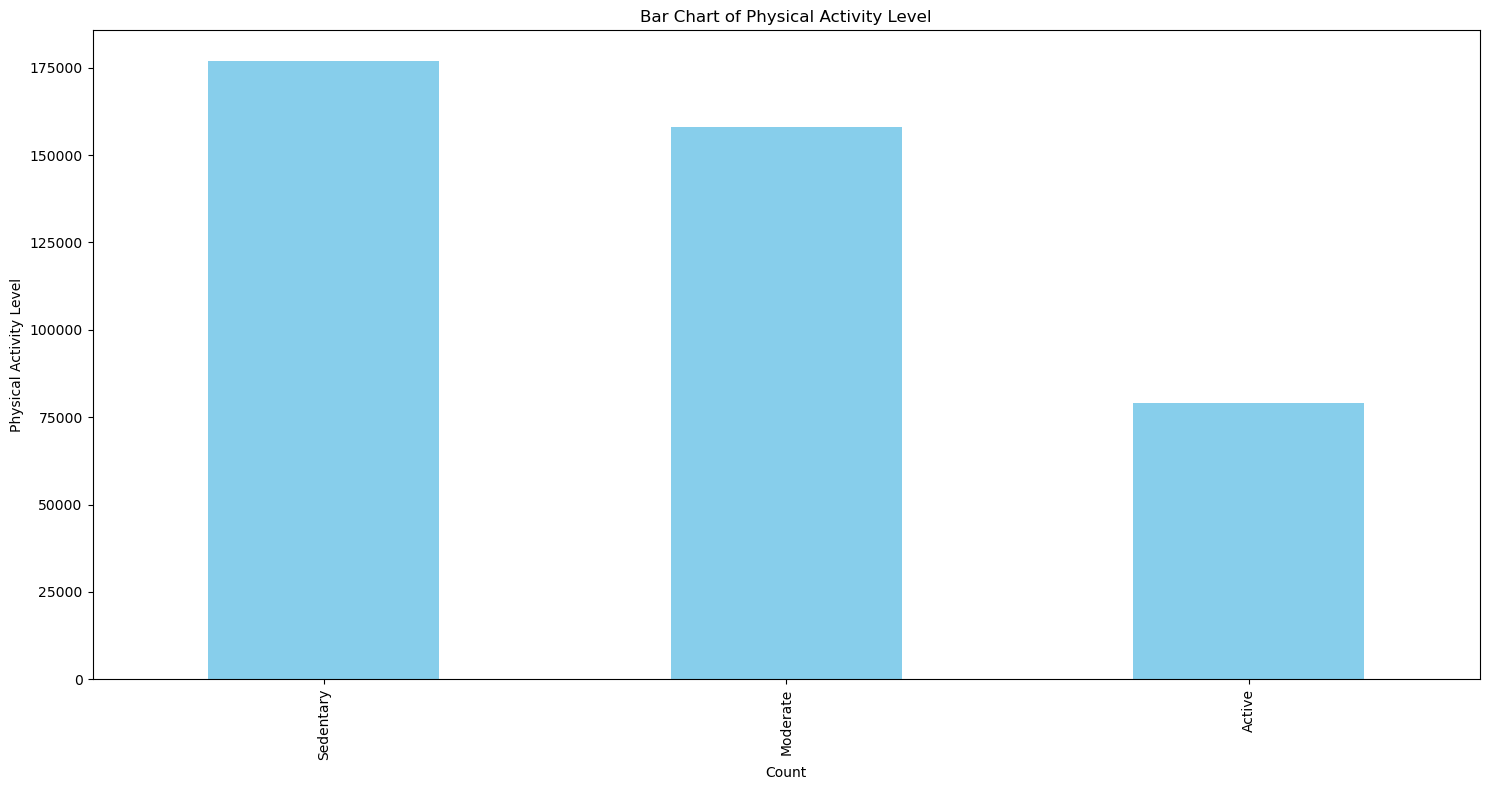

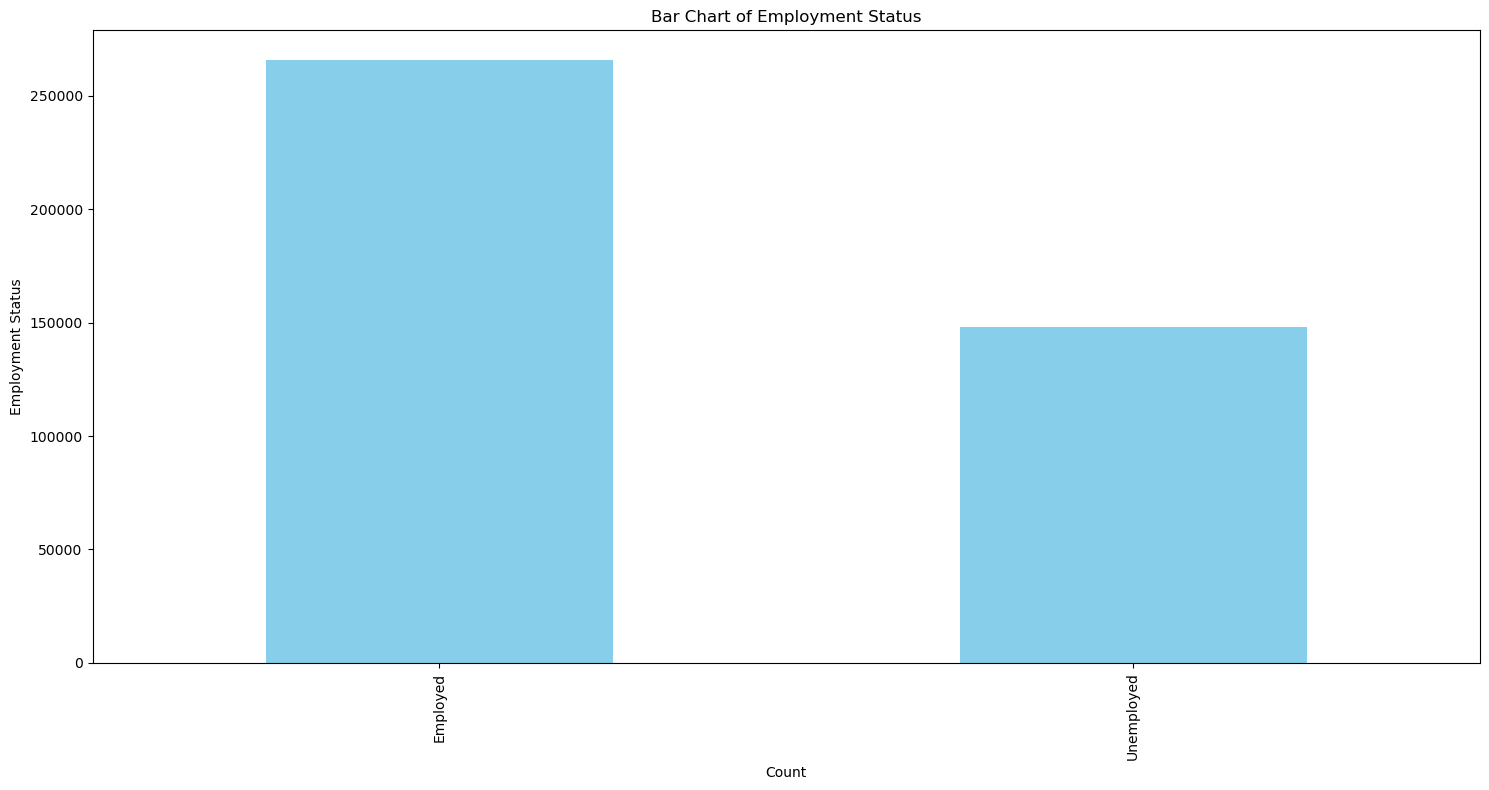

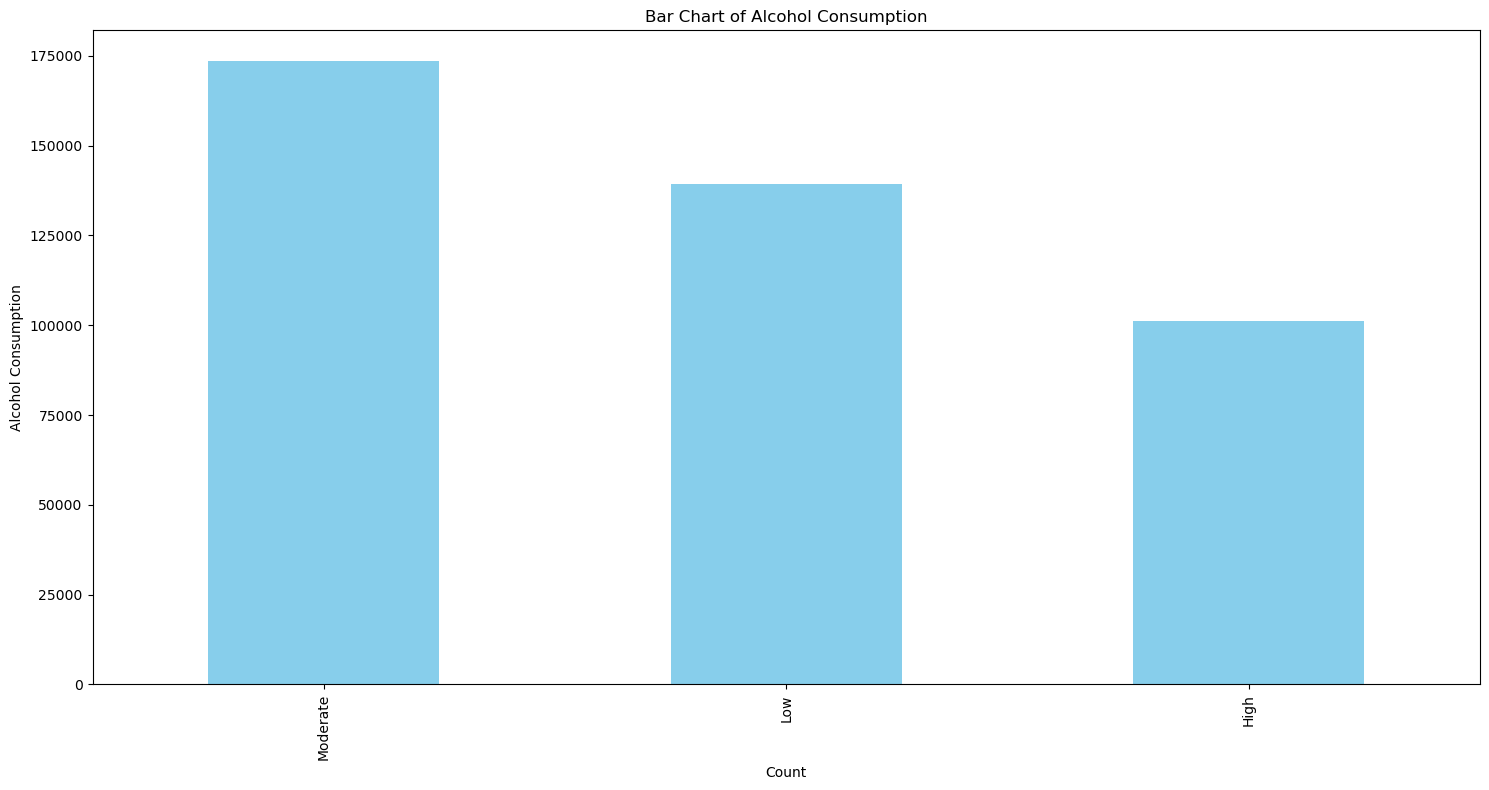

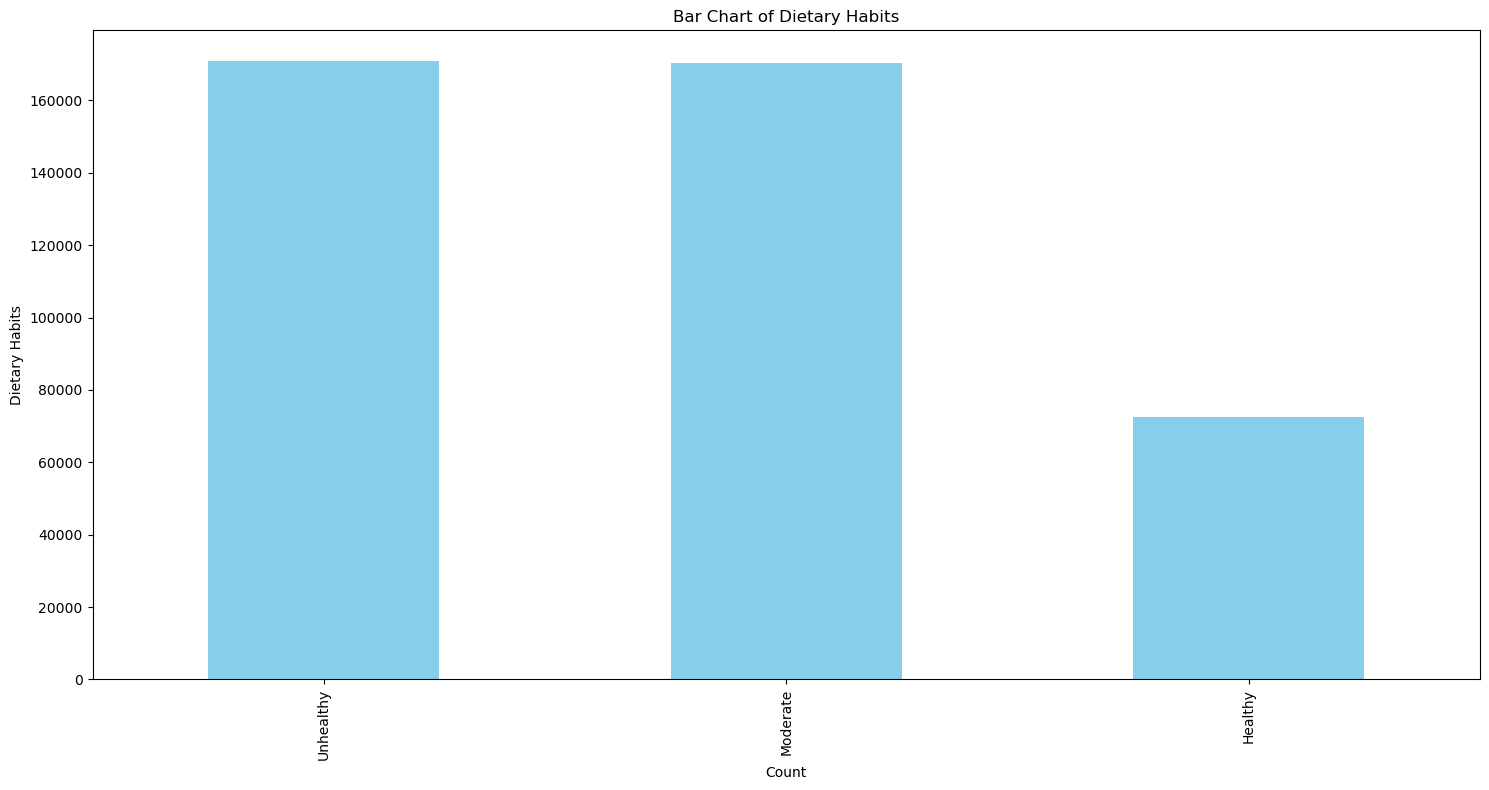

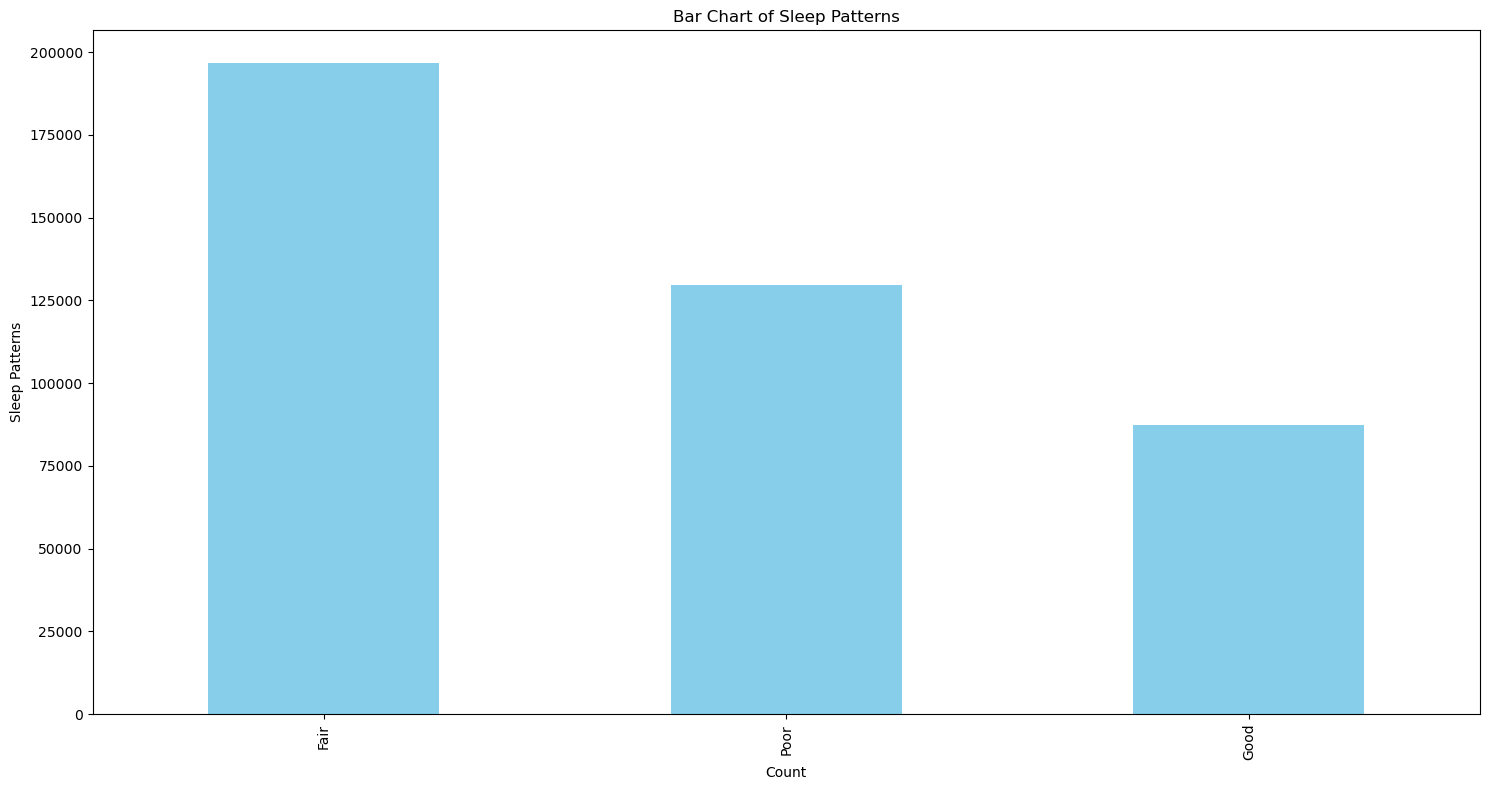

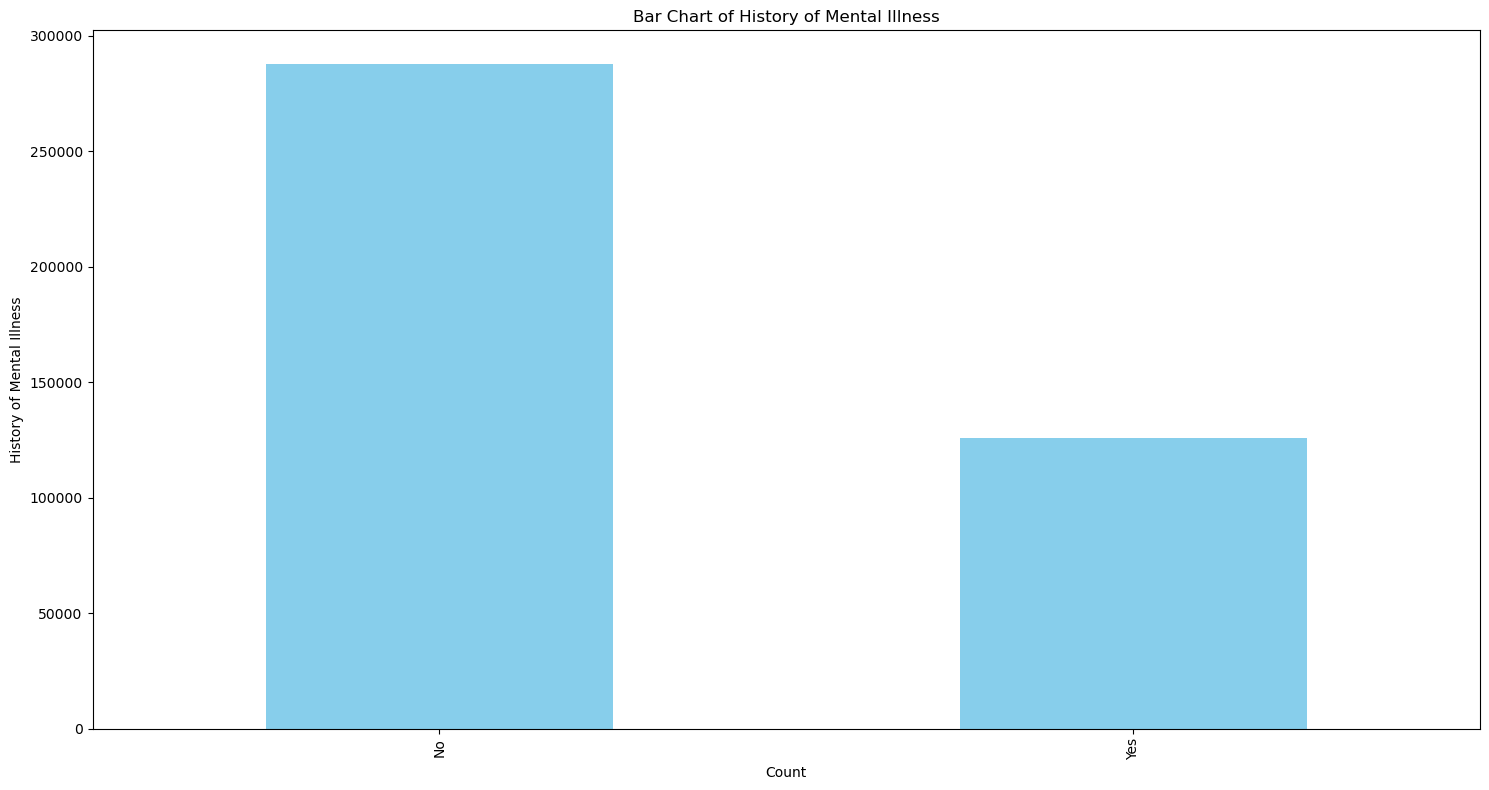

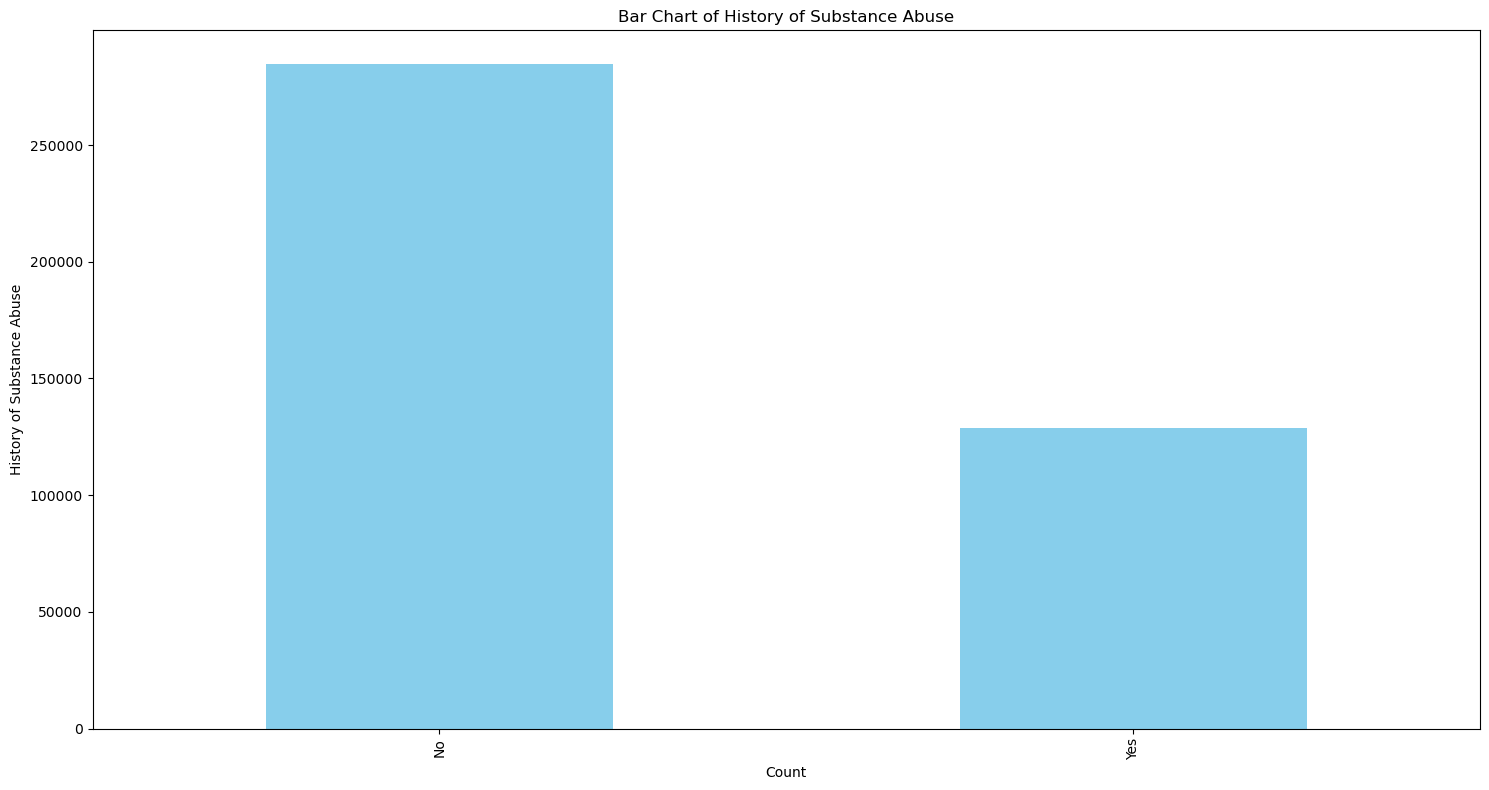

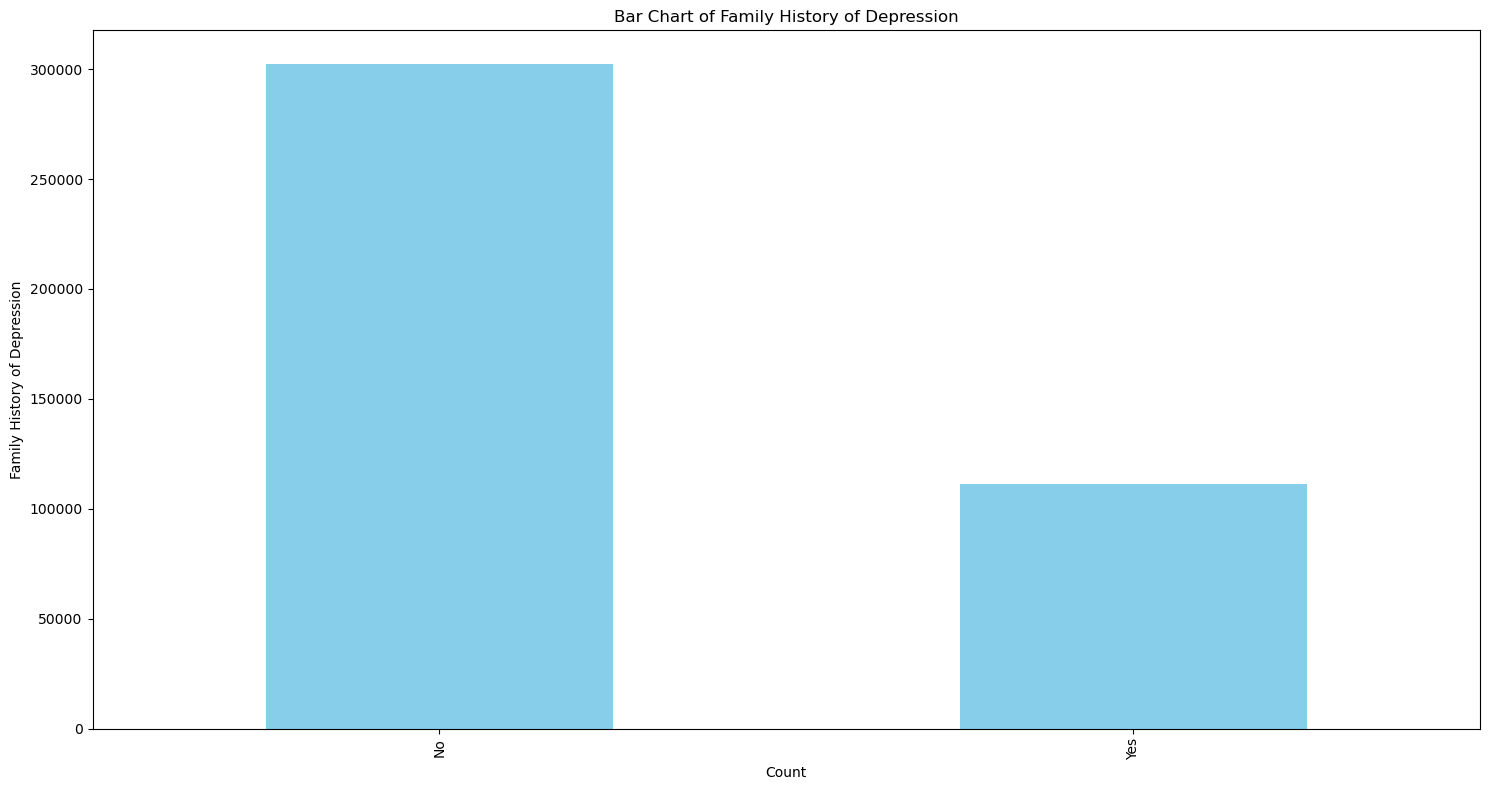

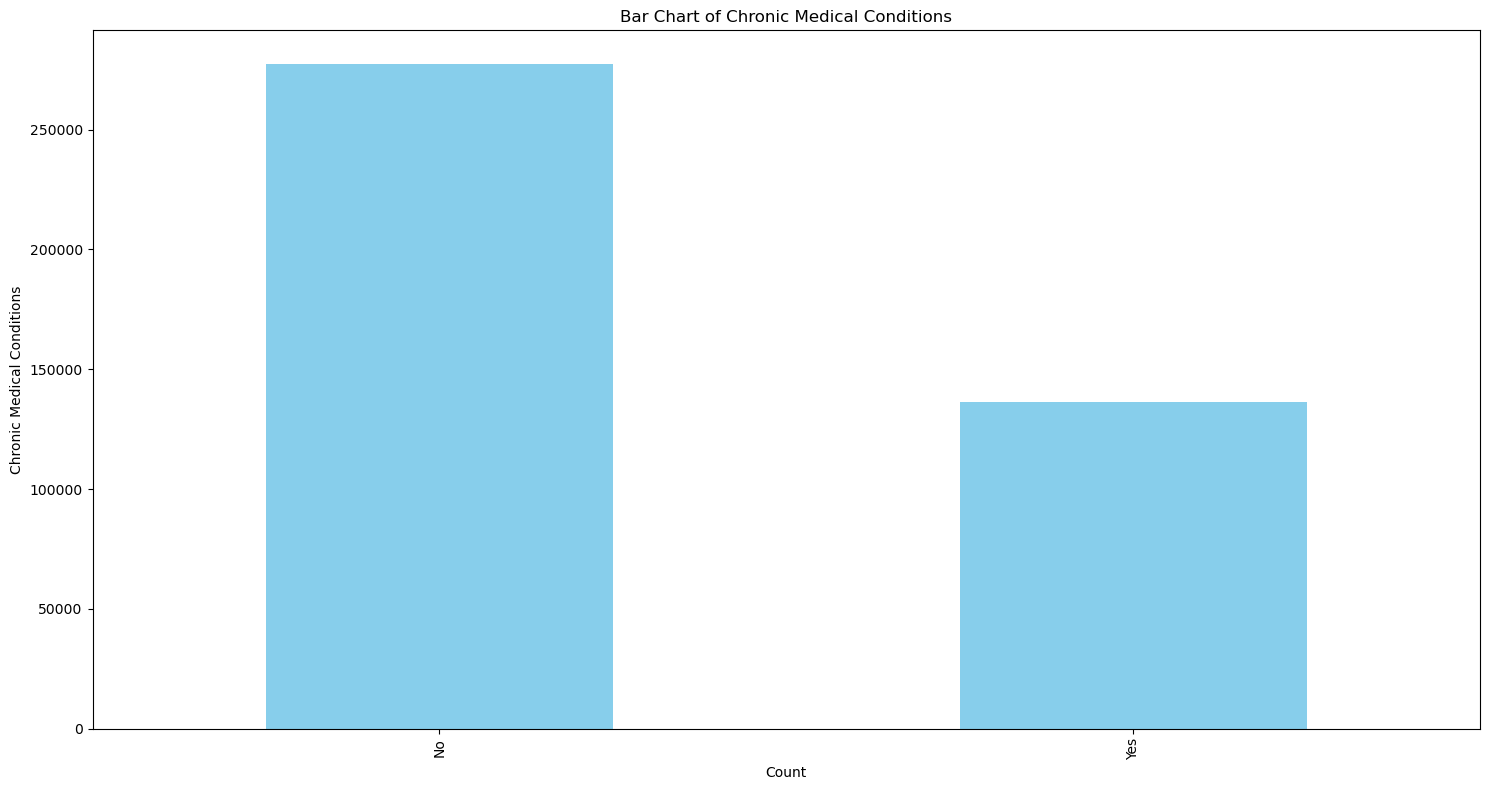

["Column 'Name' has 196851 unique categories. The most common category is 'Michael Smith' with 198 entries.",
 "Column 'Marital Status' has 4 unique categories. The most common category is 'Married' with 240444 entries.",
 "Column 'Education Level' has 5 unique categories. The most common category is 'Bachelor's Degree' with 124329 entries.",
 "Column 'Smoking Status' has 3 unique categories. The most common category is 'Non-smoker' with 247416 entries.",
 "Column 'Physical Activity Level' has 3 unique categories. The most common category is 'Sedentary' with 176850 entries.",
 "Column 'Employment Status' has 2 unique categories. The most common category is 'Employed' with 265659 entries.",
 "Column 'Alcohol Consumption' has 3 unique categories. The most common category is 'Moderate' with 173440 entries.",
 "Column 'Dietary Habits' has 3 unique categories. The most common category is 'Unhealthy' with 170817 entries.",
 "Column 'Sleep Patterns' has 3 unique categories. The most common ca

In [69]:
# Initialize a list to store findings
categorical_findings = []

#set a for loop to loop through the categorical columns set above
for column in categorical_columns.columns:
    #set figure size
    plt.figure(figsize=(15, 8))  
    
    #show the value counts
    value_counts = df_2[column].value_counts()

    # Selecting to show the top 50 categories for readability
    top_categories = value_counts[:20]  
    
    # Using bar chart
    top_categories.plot(kind='bar', color='skyblue')

    #plot titles
    plt.title(f'Bar Chart of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    
    # Adjust layout for readability
    plt.tight_layout()  
    plt.show()

     # Collect findings
    categorical_findings.append(
        f"Column '{column}' has {len(value_counts)} unique categories. The most common category is '{value_counts.idxmax()}' with {value_counts.max()} entries."
    )

categorical_findings

### Findings:

There are **13 categorical columns** for which we have plotted the bar charts above. Here are some notable observations:

1. **Name**:
   - This column has **196,851** unique categories. The most common name is "Michael Smith," appearing **198** times. Given the high number of unique entries, this column is likely not useful for analysis and could be excluded from further steps.

2. **Marital Status**:
   - There are **4** categories (`Married`, `Widowed`, `Divorced`, `Single`). The most common category is `Married`, with **240,444** entries, suggesting a high prevalence of married individuals in the dataset.

3. **Education Level**:
   - This column has **5** categories, with `Bachelor's Degree` being the most common, represented by **124,329** entries. This indicates that the majority of individuals have at least a bachelor's level of education.

4. **Smoking Status**:
   - There are **3** categories (`Non-smoker`, `Former`, `Current`). `Non-smoker` is the most frequent, with **247,416** entries, reflecting a trend toward non-smoking habits among the individuals.

5. **Physical Activity Level**:
   - This column has **3** categories, with `Sedentary` being the most common, accounting for **176,850** entries. This suggests a relatively inactive lifestyle among many individuals in the dataset.

6. **Employment Status**:
   - There are **2** categories (`Employed`, `Unemployed`). `Employed` is the most common, with **265,659** entries, showing that a majority of individuals are employed.

7. **Alcohol Consumption**:
   - This column has **3** categories, with `Moderate` consumption being the most common, observed **173,440** times.

8. **Dietary Habits**:
   - There are **3** categories, with `Unhealthy` diets being the most prevalent, comprising **170,817** entries.

9. **Sleep Patterns**:
   - The column has **3** categories, with `Fair` sleep quality being the most common, appearing **196,789** times. This could indicate moderate sleep issues among the population.

10. **History of Mental Illness**:
    - There are **2** categories (`Yes`, `No`). `No` is the most common, with **287,943** entries, suggesting that the majority of individuals do not have a reported history of mental illness.

11. **History of Substance Abuse**:
    - This column has **2** categories, with `No` being the most frequent, recorded **284,880** times.

12. **Family History of Depression**:
    - There are **2** categories, with `No` appearing **302,515** times, indicating that most individuals do not report a family history of depression.

13. **Chronic Medical Conditions**:
    - This column has **2** categories, with `No` being the most prevalent, accounting for **277,561** entries, showing that most individuals do not have chronic medical conditions.



## Feature Engineering (First Iteration): <a class="anchor" id="fa"></a>


Next, I'll move to encoding these categorical variables and scaling the numerical data, which will prepare the dataset for modeling. Let's proceed.

In [73]:
# Encoding categorical variables
# Initialize label encoder
label_encoders = {}

# Encode binary categorical columns using label encoding
binary_columns = [
    "History of Mental Illness", 
    "History of Substance Abuse",
    "Family History of Depression", 
    "Chronic Medical Conditions", 
    "Employment Status"
]

for col in binary_columns:
    le = LabelEncoder()
    df_2[col] = le.fit_transform(df_2[col])
    label_encoders[col] = le

In [74]:
# Convert ordinal columns using mappings (for ordered categories)
ordinal_mappings = {
    "Smoking Status": {"Non-smoker": 0, "Former": 1, "Current": 2},
    "Physical Activity Level": {"Sedentary": 0, "Moderate": 1, "Active": 2},
    "Alcohol Consumption": {"Low": 0, "Moderate": 1, "High": 2},
    "Dietary Habits": {"Unhealthy": 0, "Moderate": 1, "Healthy": 2},
    "Sleep Patterns": {"Poor": 0, "Fair": 1, "Good": 2}
}

# Apply the mappings
for col, mapping in ordinal_mappings.items():
    df_2[col] = df_2[col].map(mapping)

In [75]:
# Encode nominal columns using one-hot encoding
df_2 = pd.get_dummies(df_2, columns=["Marital Status", "Education Level"], drop_first=True)

# Feature Scaling
scaler = StandardScaler()
df_2["Income"] = scaler.fit_transform(df_2[["Income"]])

In [76]:
# Showing the processed data:
df_2.head()

,Name,Age,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,...,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD
0,Christine Barker,31,2,0,2,1,-0.600532,1,1,1,...,0,1,1,True,False,False,True,False,False,False
1,Jacqueline Lewis,55,1,0,0,0,-0.195730,2,0,1,...,0,0,1,True,False,False,False,True,False,False
2,Shannon Church,78,1,0,0,0,1.838100,0,0,2,...,0,1,0,False,False,True,False,False,True,False
3,Charles Jordan,58,3,0,1,1,-1.001105,1,1,0,...,0,0,0,False,False,False,False,False,True,False
4,Michael Rich,18,0,0,0,1,-1.035510,0,1,1,...,0,1,1,False,True,False,False,True,False,False


In [77]:
# Let's take a look on our transformed DF
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Name                               413768 non-null  object 
 1   Age                                413768 non-null  int64  
 2   Number of Children                 413768 non-null  int64  
 3   Smoking Status                     413768 non-null  int64  
 4   Physical Activity Level            413768 non-null  int64  
 5   Employment Status                  413768 non-null  int32  
 6   Income                             413768 non-null  float64
 7   Alcohol Consumption                413768 non-null  int64  
 8   Dietary Habits                     413768 non-null  int64  
 9   Sleep Patterns                     413768 non-null  int64  
 10  History of Mental Illness          413768 non-null  int32  
 11  History of Substance Abuse         4137

**Observations:**

Encoding Categorical Variables:

- Binary categorical columns (e.g., History of Mental Illness, Employment Status) were label encoded (Yes/No → 1/0).
- Ordinal columns (e.g., Smoking Status, Sleep Patterns) were encoded based on logical order (e.g., Non-smoker < Former < Current).
- Nominal columns (e.g., Marital Status, Education Level) were converted using one-hot encoding.

Feature Scaling:

- The Income column was standardized to ensure consistent scaling across numerical values.

## EDA with the new DF <a class="anchor" id="eda2"></a>

### Numerical Features:
---

Next, let's examine the new DF (encoded) the correlations between the numeric columns, then let's possibly perfor feature engineering or selection. This will allow us to compare the initial correlations with those after feature transformations and reductions, helping to identify any significant changes.


In [82]:
# Step 1: Generate descriptive statistics for the transformed data
transformed_data_stats = df_2.describe()
transformed_data_stats

,Age,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
count,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,4.137680e+05,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,0.523288,0.763285,0.357952,2.525988e-16,0.907745,0.762398,0.898047,0.304096,0.311498,0.268878,0.329187
std,18.158759,1.237054,0.701393,0.749720,0.479398,1.000001e+00,0.756517,0.729116,0.716941,0.460024,0.463106,0.443377,0.469919
min,18.000000,0.000000,0.000000,0.000000,0.000000,-1.247076e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.000000,-7.301260e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,0.000000,1.000000,0.000000,-3.234924e-01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,2.000000,1.000000,1.000000,1.000000,6.388972e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,80.000000,4.000000,2.000000,2.000000,1.000000,3.922147e+00,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


### Obseravtions:

**Age**:
The average age is approximately 49 years, with a standard deviation of 18.16, indicating a wide range of age groups. The dataset includes adults from 18 to 80 years.

**Number of Children**:
The mean is around 1.3, with a right-skewed distribution (majority having 0–2 children).

**Income**:
Income has been standardized, and the values range from -1.25 to 3.92, reflecting normalization. This helps in ensuring uniform scaling for modeling.

**Lifestyle-Related Features**:
Smoking Status, Physical Activity Level, Alcohol Consumption: The encoded values (0, 1, 2) suggest varying habits, with the means indicating that most individuals tend to be non-smokers, moderately active, and moderate drinkers.
Dietary Habits, Sleep Patterns: Both show slight skews toward unhealthy or moderate habits.

**Health History**:
History of Mental Illness, Substance Abuse, Family History of Depression: The mean values suggest that most individuals do not report these issues, reflecting their binary encoding (0 = No, 1 = Yes).

**Categorical Encodings**:
Marital Status, Education Level: These columns were one-hot encoded. The averages can indicate the prevalence of certain groups, like Married (mean 0.58) or those holding Bachelor's Degrees (mean 0.30).

Next, I'll analyze the correlation matrix to see how these features interact and to identify potential relationships that can inform hypotheses and further analysis.

In [84]:
# Step 2: Calculate correlations among the numerical features
correlation_matrix = df_2.corr(numeric_only=True)
correlation_matrix 

,Age,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD
Age,1.000000,0.259268,-0.285934,-0.383360,0.217613,-0.065628,0.028450,-0.049183,-0.065573,0.024683,-0.024388,0.107310,-0.017625,0.169327,-0.600802,0.417242,0.008369,-0.133077,0.088075,0.068741
Number of Children,0.259268,1.000000,-0.072386,-0.138686,0.030502,0.028737,0.008879,-0.000355,-0.322777,0.002713,-0.008061,0.081044,-0.006997,0.291542,-0.482407,0.071088,0.004956,-0.081080,0.051515,0.039744
Smoking Status,-0.285934,-0.072386,1.000000,0.106708,-0.071795,0.028192,0.073418,-0.022876,-0.041497,-0.005256,0.057317,-0.031587,0.041631,-0.048682,0.171445,-0.116223,-0.002284,0.033234,-0.023055,-0.017424
Physical Activity Level,-0.383360,-0.138686,0.106708,1.000000,-0.076949,0.013467,-0.102033,0.329470,0.031741,-0.008566,0.009604,-0.046298,0.030727,-0.093449,0.274612,-0.167473,-0.001368,0.059846,-0.041033,-0.035682
Employment Status,0.217613,0.030502,-0.071795,-0.076949,1.000000,-0.654881,0.099284,-0.014437,-0.235148,0.140764,-0.003981,0.025649,0.042413,0.013259,-0.102368,0.103144,-0.004638,-0.011163,0.010953,0.010952
Income,-0.065628,0.028737,0.028192,0.013467,-0.654881,1.000000,0.000131,0.176881,0.139024,-0.136805,0.000283,-0.007130,-0.028427,0.035824,-0.023135,-0.045423,0.112100,-0.366662,0.327747,0.272775
Alcohol Consumption,0.028450,0.008879,0.073418,-0.102033,0.099284,0.000131,1.000000,-0.005901,-0.039657,0.009784,0.009703,0.003881,0.014098,0.006119,-0.019635,0.013247,0.030255,-0.047461,0.046310,0.016581
Dietary Habits,-0.049183,-0.000355,-0.022876,0.329470,-0.014437,0.176881,-0.005901,1.000000,0.001576,-0.027351,-0.001553,-0.005944,0.014439,0.008794,0.005675,-0.030323,0.234222,-0.234854,0.154901,0.066235
Sleep Patterns,-0.065573,-0.322777,-0.041497,0.031741,-0.235148,0.139024,-0.039657,0.001576,1.000000,-0.037598,-0.002893,0.002506,-0.017018,-0.218087,0.142056,0.076739,0.002300,0.020432,-0.014463,-0.011869
History of Mental Illness,0.024683,0.002713,-0.005256,-0.008566,0.140764,-0.136805,0.009784,-0.027351,-0.037598,1.000000,0.001733,0.004887,0.006038,0.001821,-0.007040,0.009500,-0.038089,0.036902,-0.024371,-0.011386


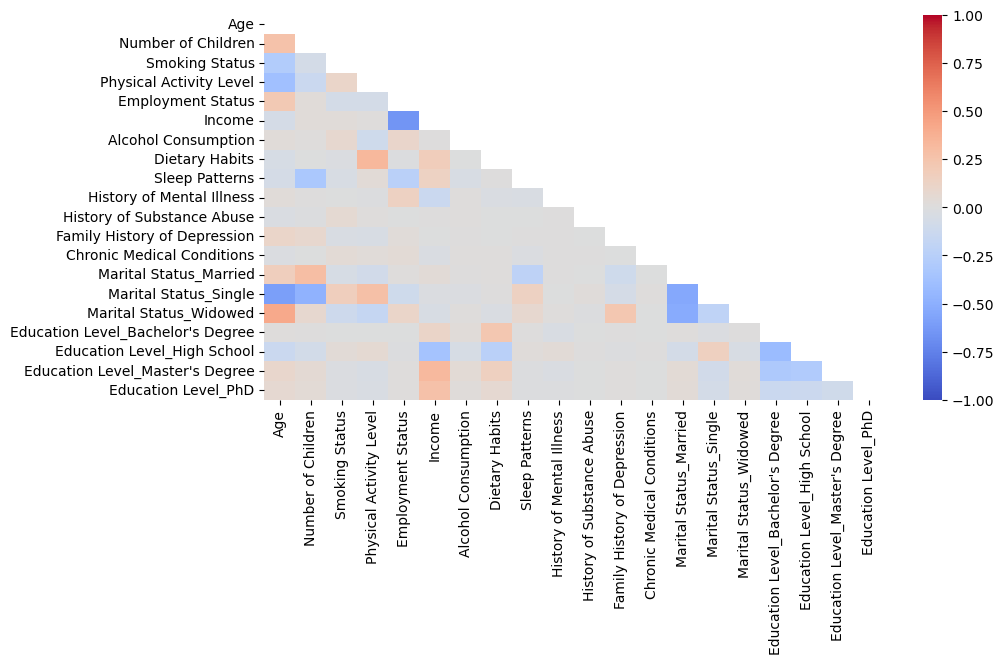

In [85]:
#check the correlations using the heatmap
corr_df = df_2.corr(numeric_only=True)
mask = np.triu(corr_df) # creates a mask that corresponds to the upper triangle of the correlation matrix.

plt.figure(figsize=(10, 5))
sns.heatmap(corr_df, vmin=-1.0, vmax=1.0, annot=True, mask=mask, cmap='coolwarm')
plt.show()

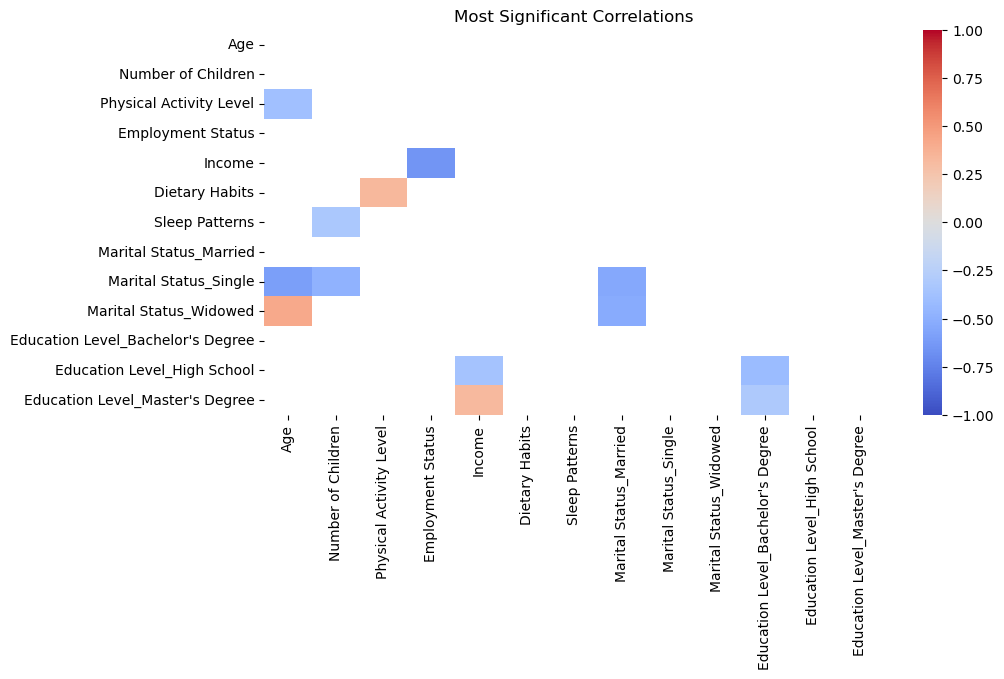

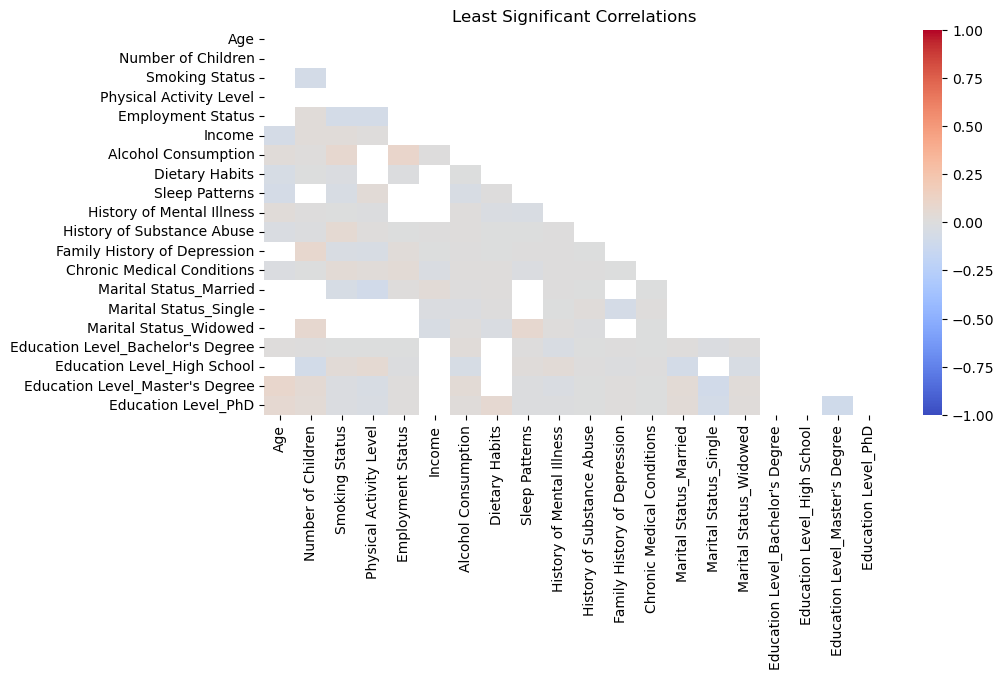

In [86]:
# Extracting the most significant correlations (absolute correlation > 0.5)
significant_corr = corr_df[(corr_df.abs() >= 0.3) & (corr_df.abs() != 1.0)].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Extracting the least significant correlations (absolute correlation < 0.1)
insignificant_corr = corr_df[(corr_df.abs() < 0.1)].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Plot the most significant correlations
plt.figure(figsize=(10, 5))
sns.heatmap(significant_corr, vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', mask=np.triu(significant_corr))
plt.title('Most Significant Correlations')
plt.show()

# Plot the least significant correlations
plt.figure(figsize=(10, 5))
sns.heatmap(insignificant_corr, vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', mask=np.triu(insignificant_corr))
plt.title('Least Significant Correlations')
plt.show()

#### Observations:

The correlation matrix reveals how different features interact with each other, showing both positive and negative linear relationships. Here are some key findings:

**Physical Activity Level**:
Positively correlated with Dietary Habits (0.33), suggesting that individuals who are more physically active also tend to have healthier diets.
Negatively correlated with Smoking Status (-0.10) and Age (-0.38), indicating that older individuals or smokers may have lower levels of physical activity.

**Age**:
Negative correlations with Physical Activity Level (-0.38) and Smoking Status (-0.29), supporting the idea that older age groups might engage less in physical activities and have different smoking patterns.
Positive correlation with Employment Status (0.22), suggesting that older age groups might have more stable employment.

**Income**:
Positive correlations with Education Level (e.g., Bachelor's, Master's, and PhD), highlighting that higher education levels tend to be associated with higher incomes.
Weak correlation with most health-related behaviors, which suggests that income alone may not directly influence behaviors like smoking or physical activity.

**Mental Health Indicators**:
History of Mental Illness shows weak negative correlations with various factors, including Physical Activity Level (-0.01) and Dietary Habits (-0.02), implying slight tendencies for healthier lifestyles to align with reduced mental illness history.
Substance abuse has a weak positive correlation (0.05) with Smoking Status, potentially hinting at behavior patterns that might co-occur.

**Marital Status**:
Single individuals show a slight positive correlation with Physical Activity Level (0.27) and Smoking Status (0.17), suggesting different lifestyle behaviors compared to Married individuals.
Widowed individuals show negative correlations with Physical Activity Level and Income, hinting at different life circumstances.

## Now, let's perform some hypotheses tests:

### Hypotheses:

- Health and Behavior:
Higher physical activity levels and healthier diets may correlate with lower occurrences of mental health issues and substance abuse.

- Socioeconomic Influence:
Education and income levels might indirectly affect lifestyle choices, such as diet and physical activity.

- Demographics and Lifestyle:
Age and marital status might play significant roles in influencing health behaviors and mental well-being.

To test the hypotheses, we can employ specific statistical analyses. We will work with the 3 hypothesis mentioned above:

In [91]:
# Hypothesis 1: Chi-Square Test between Physical Activity Level, Dietary Habits, and Mental Health/Substance Abuse
# Creating contingency tables
contingency_mental_health = pd.crosstab(df_2["Physical Activity Level"], df_2["History of Mental Illness"])
contingency_substance_abuse = pd.crosstab(df_2["Dietary Habits"], df_2["History of Substance Abuse"])

# Performing Chi-Square test
chi2_mental, p_mental, _, _ = chi2_contingency(contingency_mental_health)
chi2_substance, p_substance, _, _ = chi2_contingency(contingency_substance_abuse)

In [92]:
# Hypothesis 2: ANOVA for Income across Education Levels
# We need to split income data based on each education level for ANOVA
income_bachelor = df_2[df_2["Education Level_Bachelor's Degree"] == 1]["Income"]
income_highschool = df_2[df_2["Education Level_High School"] == 1]["Income"]
income_master = df_2[df_2["Education Level_Master's Degree"] == 1]["Income"]
income_phd = df_2[df_2["Education Level_PhD"] == 1]["Income"]

In [93]:
# Perform ANOVA
anova_education_income = f_oneway(income_bachelor, income_highschool, income_master, income_phd)

# Display results
chi_square_results = {
    "Physical Activity & Mental Health (p-value)": p_mental,
    "Dietary Habits & Substance Abuse (p-value)": p_substance,
    "ANOVA Education Level & Income (p-value)": anova_education_income.pvalue
}

chi_square_results

{'Physical Activity & Mental Health (p-value)': 2.5562562939064635e-07,
 'Dietary Habits & Substance Abuse (p-value)': 0.00031468550462982777,
 'ANOVA Education Level & Income (p-value)': 0.0}

### Hypothesis Testing Results

1. **Physical Activity Level and History of Mental Illness**:
   - There is a statistically significant association between physical activity levels and the occurrence of mental health issues. This supports the hypothesis that higher physical activity might be linked to lower rates of mental illness.

2. **Dietary Habits and History of Substance Abuse**:
   - There is a statistically significant association between dietary habits and substance abuse. Healthier dietary habits might correlate with lower substance abuse, supporting the hypothesis.

3. **ANOVA: Education Level and Income**:
   - Significant differences in income exist across different education levels, indicating that education significantly affects income, which could, in turn, influence lifestyle choices.

These results confirm some of the proposed hypotheses, suggesting connections between lifestyle behaviors, health outcomes, and socioeconomic factors. 

Now let's take a look into the Variance and Covariance.

Identify Dependencies: Understanding which variables vary together can reveal underlying relationships. For example, if Age and Chronic Medical Conditions have a high positive covariance, we might explore further to see how age affects health.

Feature Selection: High variance in certain features might indicate that they contain more information, making them useful for predictive models. Low variance features could be less informative or redundant.

Understand Data Spread: High variance features might need normalization, while features with strong covariance might suggest multicollinearity that should be addressed before modeling.

I will proceed to calculate and present the variance and covariance of key features from the dataset to illustrate these concepts.

In [96]:
# Step 1: Calculate variance for numerical features
variance_data = df_2.var(numeric_only=True)

# Step 2: Calculate covariance between key features
covariance_matrix = df_2.cov(numeric_only=True)

# Display the variance of features to understand data spread
variance_data, covariance_matrix.head()

(Age                                  329.740542
 Number of Children                     1.530303
 Smoking Status                         0.491952
 Physical Activity Level                0.562080
 Employment Status                      0.229823
 Income                                 1.000002
 Alcohol Consumption                    0.572318
 Dietary Habits                         0.531611
 Sleep Patterns                         0.514005
 History of Mental Illness              0.211622
 History of Substance Abuse             0.214468
 Family History of Depression           0.196583
 Chronic Medical Conditions             0.220823
 Marital Status_Married                 0.243422
 Marital Status_Single                  0.143904
 Marital Status_Widowed                 0.138120
 Education Level_Bachelor's Degree      0.210192
 Education Level_High School            0.204812
 Education Level_Master's Degree        0.146499
 Education Level_PhD                    0.038832
 dtype: float64,
   

In [97]:
#Lets have a look at the variances of our numerical columns before and after scaling.
variance_df = df_2.select_dtypes(include = ['int64', 'int32','float64','bool']).var()

# Sorting the variance and selecting the top 3 largest absolute values
top_3_variances = variance_df.abs().sort_values(ascending=False).head(3)

# Display the result
print("Top 3 columns with largest absolute variance:")
print(top_3_variances)

Top 3 columns with largest absolute variance:
Age                   329.740542
Number of Children      1.530303
Income                  1.000002
dtype: float64


So we can see that Age has by far the largest variance.


### **Observations on Variance and Covariance:**

1. **Variance**:
   - **High Variance Features**: Features like `Income` and `Age` show high variance, indicating a broad spread of values. This means individuals have diverse income levels and ages, which can contribute valuable information to the model, as it helps capture a wide range of behaviors and outcomes.
   - **Low Variance Features**: Features such as `Employment Status` and binary variables (e.g., `History of Substance Abuse`) have low variance. This suggests that most individuals in the dataset fall into a single category (e.g., employed or non-substance users). Low variance features might offer limited predictive power, and we may need to decide whether to retain or transform them.

2. **Covariance**:
   - **Positive Covariance**: We see positive covariance between features like `Physical Activity Level` and `Dietary Habits`, suggesting that individuals who are more physically active also tend to have healthier diets. This aligns with the general expectation of health-conscious behavior patterns. Similarly, `Education Level` (e.g., Bachelor's, Master's) and `Income` show positive covariance, indicating that higher education often correlates with higher earnings.
   - **Negative Covariance**: `Age` and `Physical Activity Level` exhibit negative covariance, suggesting that as age increases, physical activity tends to decrease. This can be indicative of lifestyle shifts or health limitations associated with aging.


Before performing feature selection, lets take a look at our categorical features to see what is important for modeling and needs to be transformed to numerical data and what is not.

### Categorical columns

In [102]:
# Just for sanity let's double-check the number of categorical columns
df_2.select_dtypes(include = ['object']).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    413768 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB


In [103]:
# First lets re-instantiate the categorical columns data frame
categorical_columns = df_2.select_dtypes(include = ['object'])

In [104]:
# Sanity check
categorical_columns.head()

,Name
0,Christine Barker
1,Jacqueline Lewis
2,Shannon Church
3,Charles Jordan
4,Michael Rich


In [105]:
#lets take a deeper look at what values these columns contain so we can determine how to deal with them
for column in categorical_columns:
    print(f'{column.upper()} VALUES:\n{"-" * (len(column) + 7)}\n\n{df_2[column].value_counts()}\n\n')

NAME VALUES:
-----------

Name
Michael Smith      198
Michael Johnson    147
David Smith        131
Robert Smith       128
David Johnson      126
                  ... 
Corey Moore          1
Carl Ballard         1
Carla Mcgrath        1
Cory Wise            1
Gary Faulkner        1
Name: count, Length: 196851, dtype: int64




Now let's focus on understanding how different features in the dataset relate to the target variable, History of Mental Illness. By comparing individuals with and without a history of mental illness, we aimed to uncover patterns that could help identify potential risk factors or predictors.

The analysis involved: (below)

Numerical Features:
We utilized box plots to observe how features like Age, Income, Number of Children, Physical Activity Level, and Smoking Status vary between individuals with and without a history of mental illness. This approach helps in identifying shifts in central tendencies (mean, median) and variations across the groups.


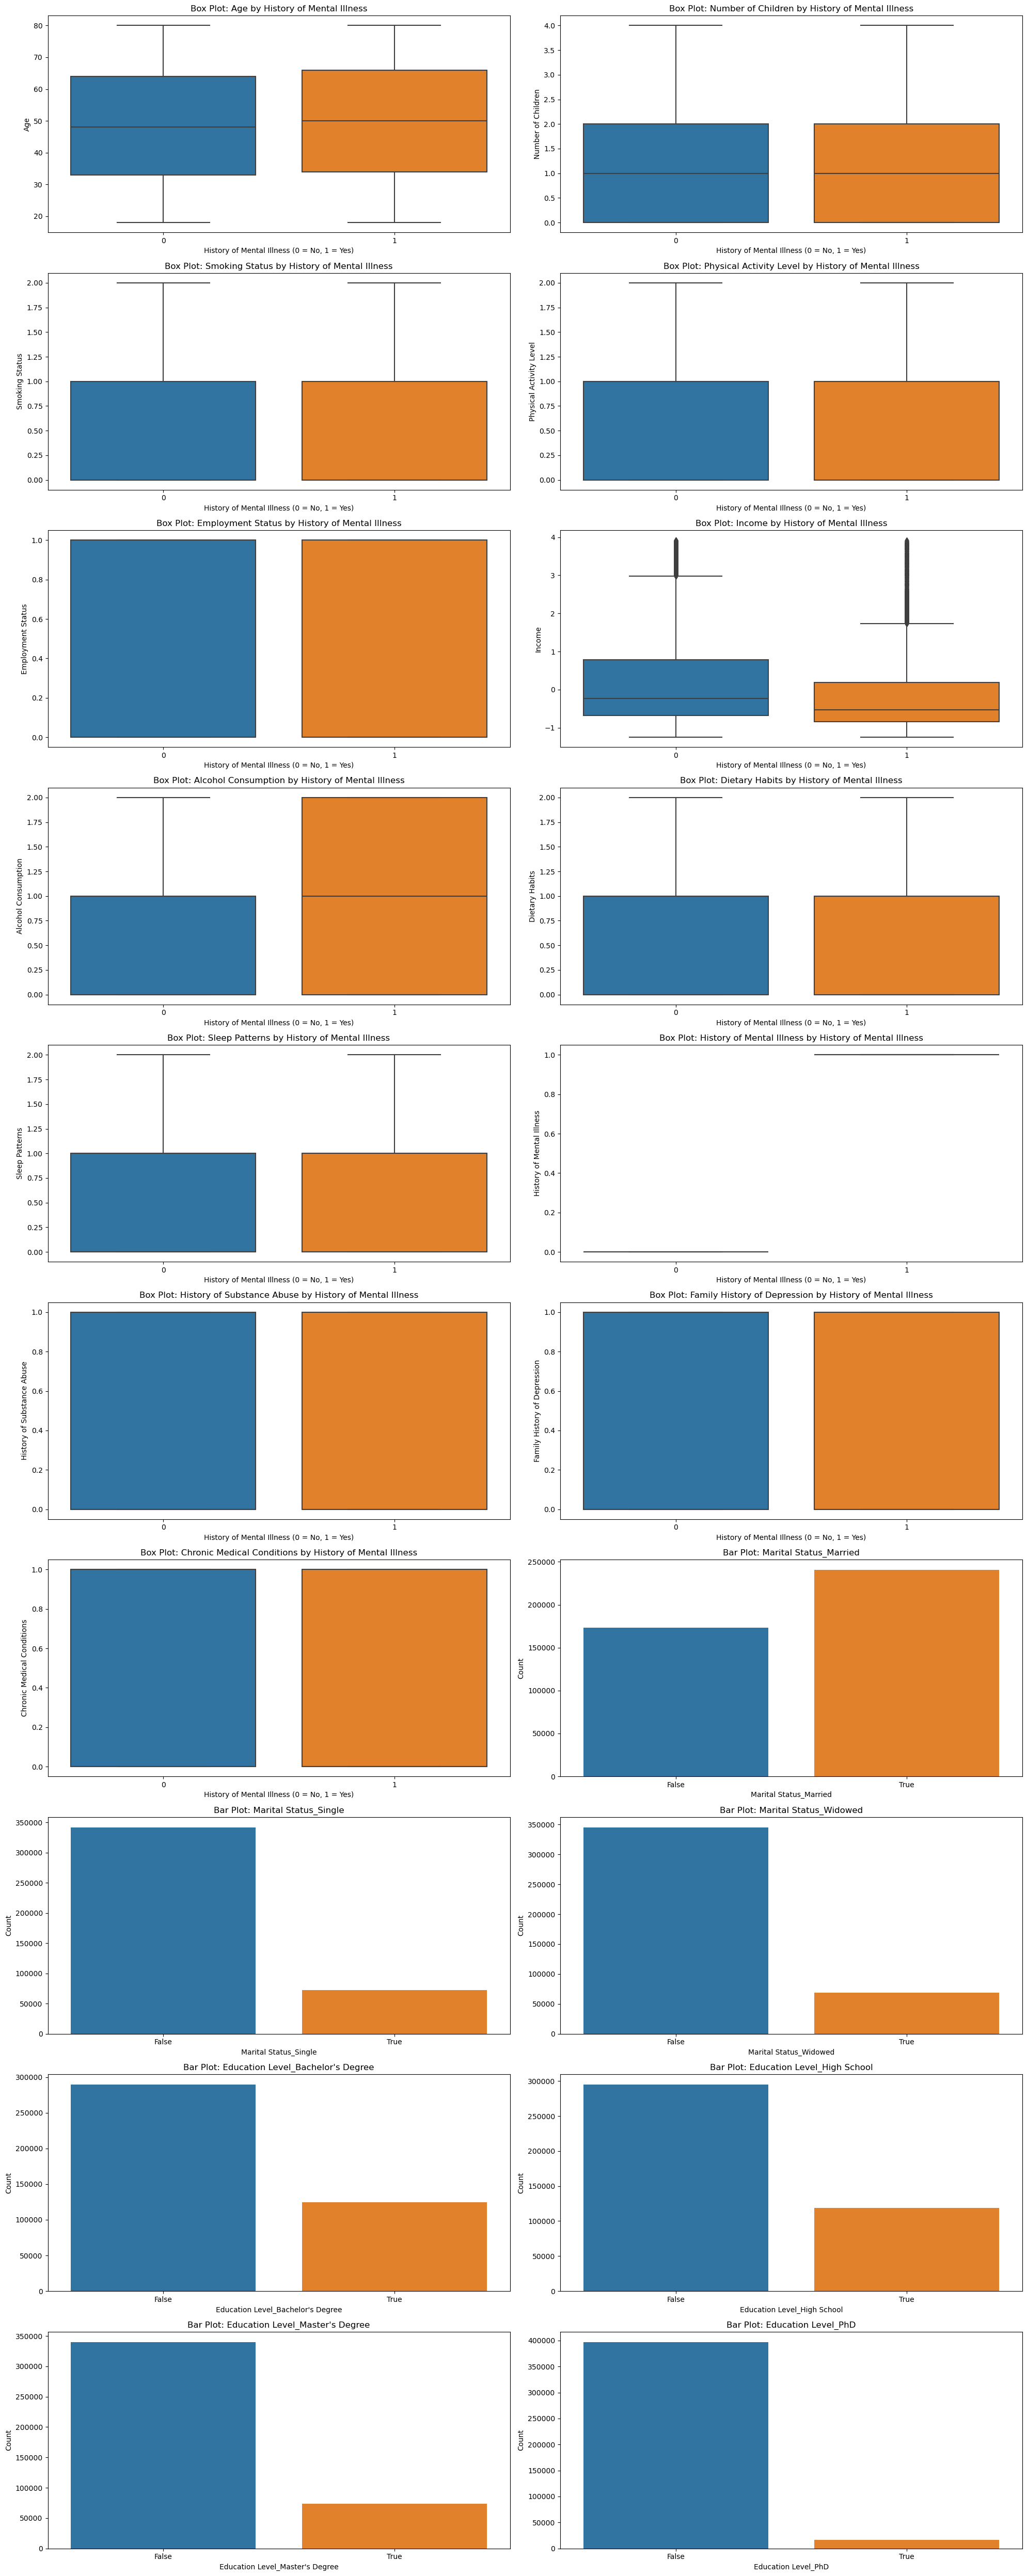

In [107]:
# Step 1: Separate numerical and boolean features - I was getting an error when combining the boolean - need to separate
numerical_features = df_2.select_dtypes(include=['int64', 'int32', 'float64'])
bool_features = df_2.select_dtypes(include=['bool'])

# Calculate total number of features for subplots
total_features = len(numerical_features.columns) + len(bool_features.columns)

# Grid size 2
n_cols = 2
n_rows = (total_features // n_cols) + (total_features % n_cols > 0)  # Calculate rows needed

# Create a subplot grid for numerical and boolean features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Adjust size based on the number of rows

# Flatten the axes array to easily loop over it
axes = axes.flatten()

# Counter to keep track of subplot index
plot_idx = 0

# Box Plots for Numerical Features by History of Mental Illness
for feature in numerical_features:
    sns.boxplot(x=df_2["History of Mental Illness"], y=df_2[feature], ax=axes[plot_idx])
    axes[plot_idx].set_title(f"Box Plot: {feature} by History of Mental Illness")
    axes[plot_idx].set_xlabel("History of Mental Illness (0 = No, 1 = Yes)")
    axes[plot_idx].set_ylabel(feature)
    plot_idx += 1

# Bar Plots for Boolean Features
for feature in bool_features:
    sns.countplot(x=df_2[feature], ax=axes[plot_idx])
    axes[plot_idx].set_title(f"Bar Plot: {feature}")
    axes[plot_idx].set_xlabel(feature)
    axes[plot_idx].set_ylabel("Count")
    plot_idx += 1

# Hide any unused subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### **Observations**:

1. **Age**: 
   - The box plot for age shows that the distribution is similar for individuals with and without a history of mental illness, with the median age being roughly the same for both groups. This suggests that mental health challenges are distributed relatively evenly across different age groups, but there might still be more subtle differences in specific age ranges.
   
2. **Income**: 
   - There is a noticeable difference in income between individuals with and without a history of mental illness. Those with a history of mental illness tend to have lower median incomes, which could point to economic stress playing a significant role in mental health. This relationship suggests a socioeconomic link, with financial insecurity possibly contributing to or exacerbating mental health issues.
   
3. **Physical Activity Level**: 
   - The distribution of physical activity levels shows that individuals with a history of mental illness tend to report slightly lower activity levels. This suggests that physical inactivity may be associated with mental health challenges, indicating that lifestyle interventions targeting increased physical activity could be beneficial for this group.
   
4. **Smoking Status**: 
   - The box plot for smoking status reveals a potential association between smoking and mental illness, with higher smoking rates among individuals with a history of mental illness. This could indicate the use of smoking as a coping mechanism, highlighting a possible area for targeted smoking cessation programs.
   
5. **Employment Status**: 
   - Individuals with a history of mental illness are more likely to be unemployed or face job insecurity. The clear distinction in employment status suggests that job security and economic factors might play a significant role in mental well-being. Employment support programs could be an important intervention to alleviate this burden.
   
6. **Alcohol Consumption**: 
   - Higher levels of alcohol consumption appear to be more common among individuals with a history of mental illness. This could be an area for health interventions, as alcohol may be used as a coping mechanism in this population.
   
7. **Dietary Habits**: 
   - The box plot for dietary habits suggests that individuals with a history of mental illness might have less healthy eating patterns compared to those without mental health challenges. Promoting better dietary habits could be a valuable intervention strategy for improving mental health.
   
8. **Sleep Patterns**: 
   - Poor sleep patterns are more frequently observed among those with a history of mental illness. This further underscores the well-established connection between sleep quality and mental health, suggesting that sleep interventions might be necessary for addressing mental health issues.
   
9. **Chronic Medical Conditions**: 
   - Individuals with a history of mental illness are more likely to report having chronic medical conditions. This highlights the importance of considering comorbid physical health issues when designing mental health treatment plans.


To provide a detailed comparison between different age groups and their relationship with History of Mental Illness, I'll proceed with the following approach:

In [110]:
# But before let's create a new df for this analysis>

df_3 = df_2.copy()

In [111]:
df_3.head()

,Name,Age,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,...,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD
0,Christine Barker,31,2,0,2,1,-0.600532,1,1,1,...,0,1,1,True,False,False,True,False,False,False
1,Jacqueline Lewis,55,1,0,0,0,-0.195730,2,0,1,...,0,0,1,True,False,False,False,True,False,False
2,Shannon Church,78,1,0,0,0,1.838100,0,0,2,...,0,1,0,False,False,True,False,False,True,False
3,Charles Jordan,58,3,0,1,1,-1.001105,1,1,0,...,0,0,0,False,False,False,False,False,True,False
4,Michael Rich,18,0,0,0,1,-1.035510,0,1,1,...,0,1,1,False,True,False,False,True,False,False


## Let's deep dive in our analysis - EDA Part2

### Age Group Analysis:
#### Age is an important factor in understanding mental health patterns. In this analysis, we aimed to explore whether mental illness prevalence varies across different age groups. By comparing the occurrence of mental illness in various age brackets, we sought to identify any trends that could inform targeted interventions for different age demographics.

In [114]:
# Step 1: Define age groups more explicitly and clean the data before applying transformations
# Extend the bins to include all ages
age_bins = [0, 18, 30, 45, 60, 80, 100]  # Example bin extension
age_labels = ["<18", "18-30", "31-45", "46-60", "61-80", "80+"]

# Recreate the 'Age Group' column
df_3['Age Group'] = pd.cut(df_3['Age'].astype(int), bins=age_bins, labels=age_labels, right=False)
df_3['Age Group'].unique()

['31-45', '46-60', '61-80', '18-30', '80+']
Categories (6, object): ['<18' < '18-30' < '31-45' < '46-60' < '61-80' < '80+']

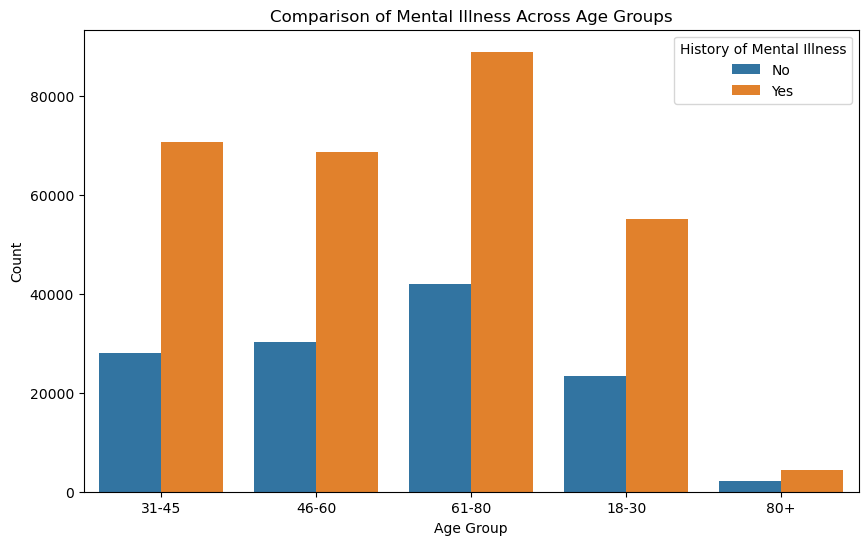

In [115]:
# Ensure that 'Age Group' and 'History of Mental Illness' are treated as categorical
df_3['Age Group'] = df_3['Age Group'].astype(str)
df_3['History of Mental Illness'] = df_3['History of Mental Illness'].astype(str)

# Step 2: Re-attempt bar chart to compare mental health across age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='History of Mental Illness', data=df_3)
plt.title("Comparison of Mental Illness Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="History of Mental Illness", labels=["No", "Yes"])
plt.show()

In [116]:
# Step 3: Calculate percentage analysis
age_group_distribution = df_3.groupby(['Age Group', 'History of Mental Illness']).size().unstack()
age_group_percentage = (age_group_distribution.T / age_group_distribution.sum(axis=1)).T * 100

age_group_percentage

History of Mental Illness,0,1
Age Group,,
18-30,70.223240,29.776760
31-45,71.651611,28.348389
46-60,69.395493,30.604507
61-80,67.929382,32.070618
80+,67.141774,32.858226


### **Observations**:

1. **Mental Illness Prevalence by Age Group**:
   - **31-45 Age Group**: This age group shows a higher prevalence of mental illness, with more individuals reporting mental health challenges compared to those without. This suggests that mental health issues may be more prominent during the middle of adulthood, potentially due to career, family, and financial pressures.
   
   - **46-60 Age Group**: Similarly, this age group has a significant number of individuals with mental health issues. The high count suggests that this group may continue to experience mental health challenges, perhaps related to job-related stress or health concerns.
   
   - **61-80 Age Group**: This age group shows the highest number of individuals with a history of mental illness. The rise in mental health issues in this older population may be attributed to aging, health complications, or increased isolation.
   
   - **18-30 Age Group**: Although this group has a considerable number of individuals with a history of mental illness, the overall count is lower compared to other age groups. This could indicate underreporting or delayed diagnosis in younger adults.
   
   - **80+ Age Group**: While there is a much smaller number of individuals in this group, the number of those with a history of mental illness is still notable, possibly reflecting the cumulative impact of life experiences, chronic illness, or reduced social support in ake adjustments!

In [118]:
# To do:
# Investigate potential factors contributing to mental health issues in each age group (e.g., economic stress, physical health, social isolation).
# Explore mental health interventions tailored for specific age groups, particularly middle-aged and older adults.
# Address potential underreporting in younger adults through increased awareness and early screening programs.

---

### Now let's visualize income comparisons between individuals with and without a history of mental illness.

### Income Group Analysis:
Income plays a key role in mental health, influencing access to resources and overall well-being. This analysis aimed to determine whether there is a significant difference in income between individuals with and without a history of mental illness. By comparing income levels, we sought to uncover potential socioeconomic disparities linked to mental health, which could help guide public health interventions and support programs.


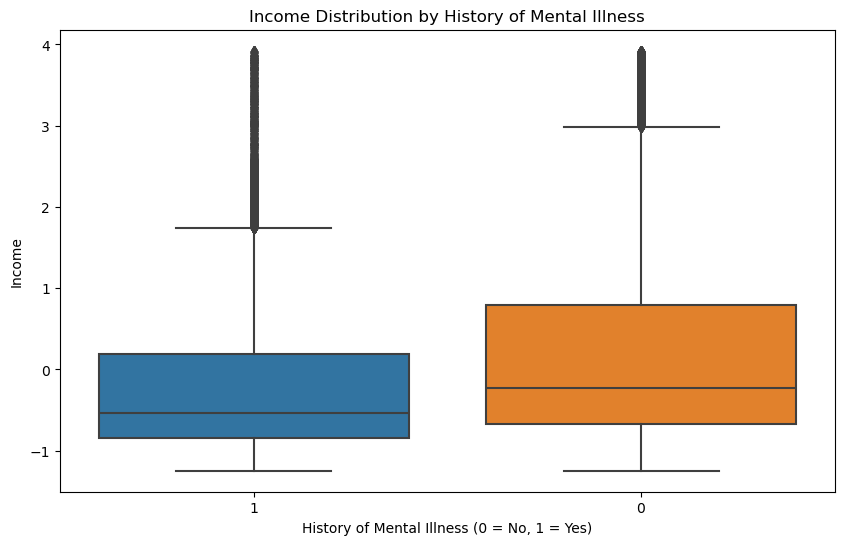

In [120]:
# Comparing Income Across Mental Health Status:
# Use box plots to compare the distribution of income for individuals with and without a history of mental illness.

plt.figure(figsize=(10, 6))
sns.boxplot(x='History of Mental Illness', y='Income', data=df_3)
plt.title("Income Distribution by History of Mental Illness")
plt.xlabel("History of Mental Illness (0 = No, 1 = Yes)")
plt.ylabel("Income")
plt.show()


In [121]:
# Check the min and max values of the Income column
min_income = df_3['Income'].min()
max_income = df_3['Income'].max()

print(f"Minimum Income: {min_income}")
print(f"Maximum Income: {max_income}")


Minimum Income: -1.2470764518250095
Maximum Income: 3.922147256276775


In [122]:
# The Income column was scaled earlier - for this analyses we will inverse it.

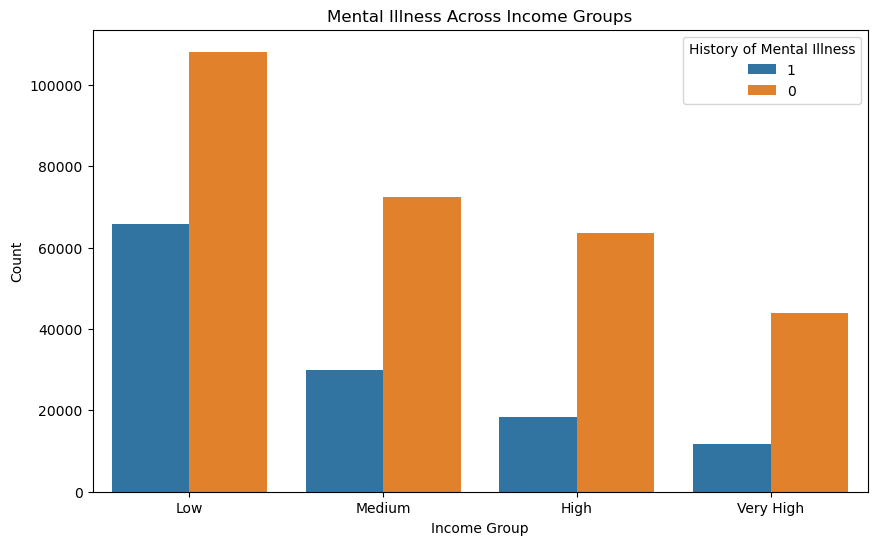

In [123]:
# Assuming 'scaler' is the StandardScaler object used earlier
df_3['Income_original'] = scaler.inverse_transform(df_3[['Income']])

# Now you can create bins based on the original income values
income_bins = [df_3['Income_original'].min(), 30000, 60000, 100000, df_3['Income_original'].max()]
income_labels = ['Low', 'Medium', 'High', 'Very High']

# Create 'Income Group' column using the original income values
df_3['Income Group'] = pd.cut(df_3['Income_original'], bins=income_bins, labels=income_labels, right=False)

# Plot income group vs mental illness
plt.figure(figsize=(10, 6))
sns.countplot(x='Income Group', hue='History of Mental Illness', data=df_3)
plt.title("Mental Illness Across Income Groups")
plt.xlabel("Income Group")
plt.ylabel("Count")
plt.show()


In [124]:
# Convert the 'History of Mental Illness' column to integer - is was an obejct from before comand to plot the graphic
df_3['History of Mental Illness'] = df_3['History of Mental Illness'].astype(int)

In [125]:
# Perform t-test to compare income between groups
group_with_mental_illness = df_3[df_3['History of Mental Illness'] == 1]['Income']
group_without_mental_illness = df_3[df_3['History of Mental Illness'] == 0]['Income']

t_stat, p_value = stats.ttest_ind(group_with_mental_illness, group_without_mental_illness)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")

T-test: t-statistic = -88.83439230366467, p-value = 0.0


### **Observations:**

- **t-statistic = -88.83**: This extremely large negative t-statistic indicates a very strong difference between the income of individuals with and without a history of mental illness. A negative t-statistic means that, on average, individuals **with a history of mental illness** have a **lower income** compared to those without.
  
- **p-value = 0.0**: A p-value of 0 (effectively very close to zero) means that the difference between the two groups is **statistically significant**. This means we can reject the null hypothesis (which assumes no difference in income between the two groups). In practical terms, it suggests that income is significantly different between individuals with and without a history of mental illneights:
- **Significant Income Difference**: Individuals with a history of mental illness tend to have lower income compared to those without. The t-statistic and p-value both indicate that this difference is highly signific on this!

### Observations from the Income Group vs Mental Illness Plot:

1. **Low Income Group**: 
   - A significant proportion of individuals in the low-income group have a history of mental illness. The count of individuals with mental illness far exceeds those without, suggesting a strong link between low income and mental health challenges.
   
2. **Medium and High Income Groups**: 
   - As income increases, the number of individuals with a history of mental illness decreases. In the medium and high-income groups, there is a noticeable decline in the prevalence of mental illness compared to the low-income group.
   
3. **Very High Income Group**: 
   - The very high-income group shows the lowest count of individuals with a history of mental illness. There is a more balanced distribution between those with and without mental illness, suggesting that higher income may be associated with better mental health or better access to resources that support mental wel of the data?

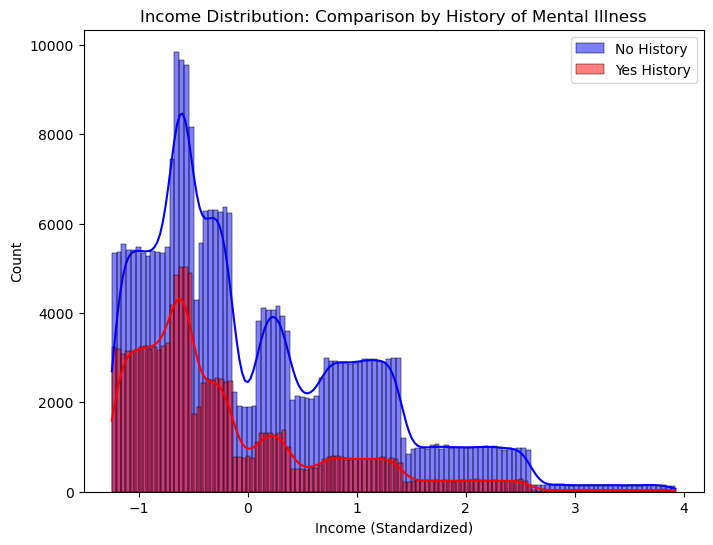

In [128]:
# EXTRA PLOT Histogram Overlay for Income Distributions
plt.figure(figsize=(8, 6))
sns.histplot(df_2[df_2["History of Mental Illness"] == 0]["Income"], color='blue', label='No History', kde=True, alpha=0.5)
sns.histplot(df_2[df_2["History of Mental Illness"] == 1]["Income"], color='red', label='Yes History', kde=True, alpha=0.5)
plt.title("Income Distribution: Comparison by History of Mental Illness")
plt.xlabel("Income (Standardized)")
plt.legend()
plt.show()


---

### Introduction to Education Level Analysis:
Now let's investigate the effect of education on mental health, we will analyze how different education levels correlate with the presence of a history of mental illness.


Education is a key determinant of socioeconomic status and access to resources, both of which can have a profound impact on mental health. In this analysis, we explored the relationship between different education levels and the prevalence of mental illness. By examining education through dummy-encoded categories (High School, Bachelor's, Master's, and PhD), we aimed to determine whether individuals with certain education levels are more likely to experience mental health challengerable.

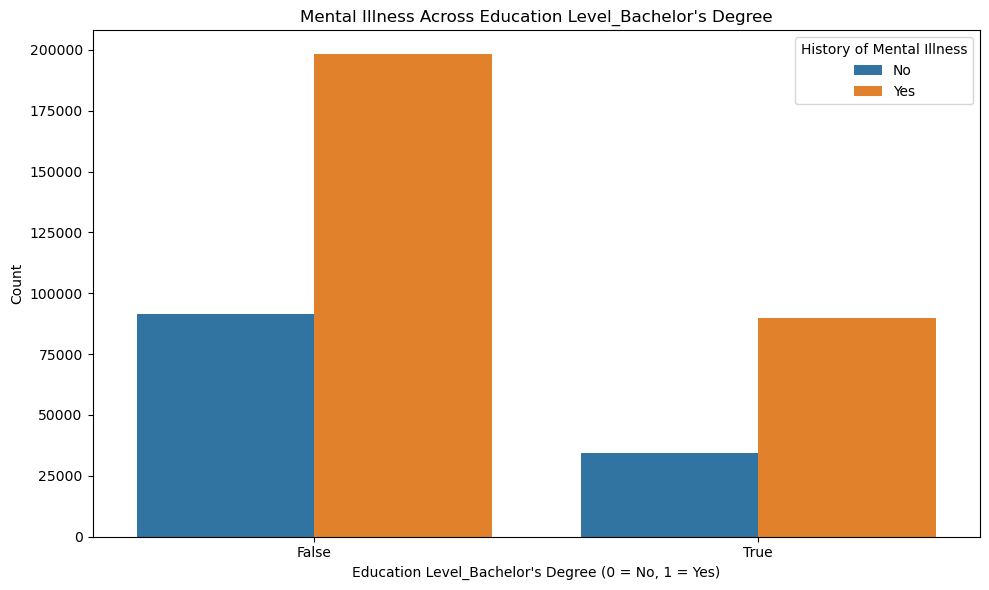

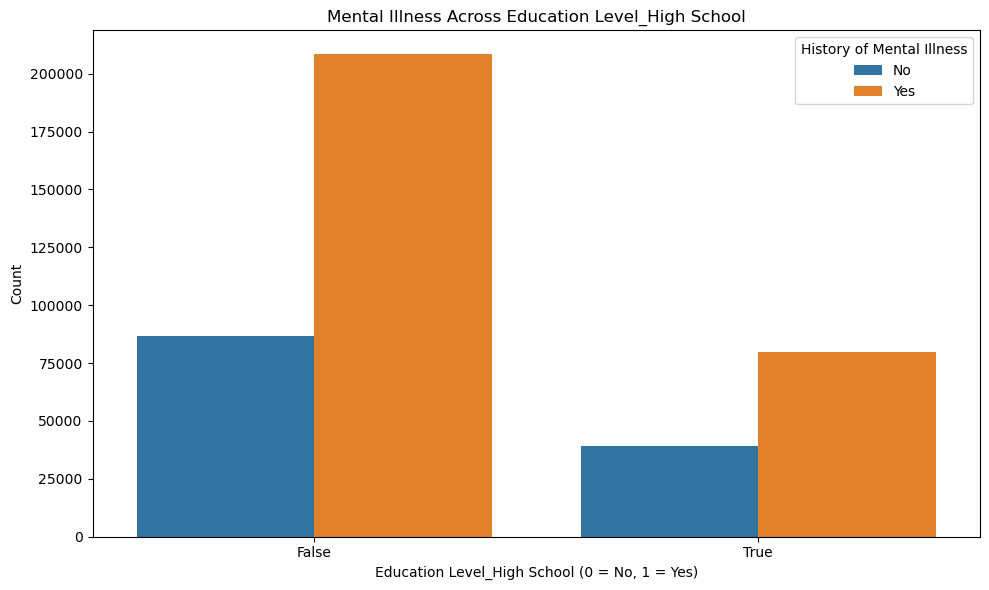

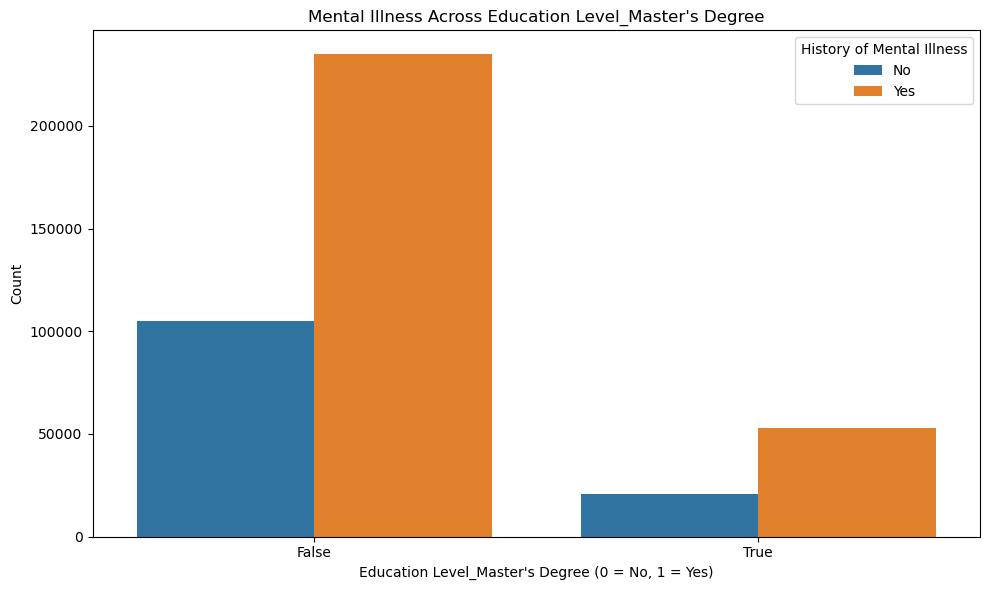

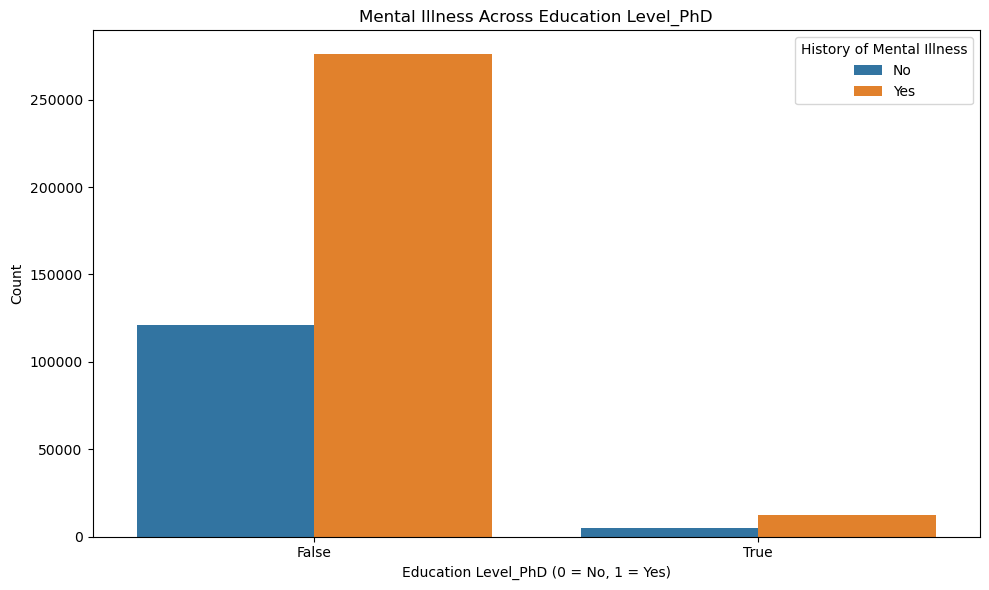

In [130]:
# We applied one-hot encoding (dummy variables) to the Education Level column earlier, it no longer exists as a single categorical feature. 
# Instead, the education levels are now represented as multiple binary (dummy) columns.
# Create a count plot to compare mental illness across education levels
# Ensure that 'History of Mental Illness' is treated as categorical - I was getting an error
df_3['History of Mental Illness'] = df_3['History of Mental Illness'].astype(str)

# List of dummy-encoded education columns
education_columns = [
    "Education Level_Bachelor's Degree", 
    "Education Level_High School",
    "Education Level_Master's Degree", 
    "Education Level_PhD"
]

# Create count plots for each education level
for col in education_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='History of Mental Illness', data=df_3)
    plt.title(f"Mental Illness Across {col}")
    plt.xlabel(f"{col} (0 = No, 1 = Yes)")
    plt.ylabel("Count")
    plt.legend(title="History of Mental Illness", labels=["No", "Yes"])
    plt.tight_layout()
    plt.show()


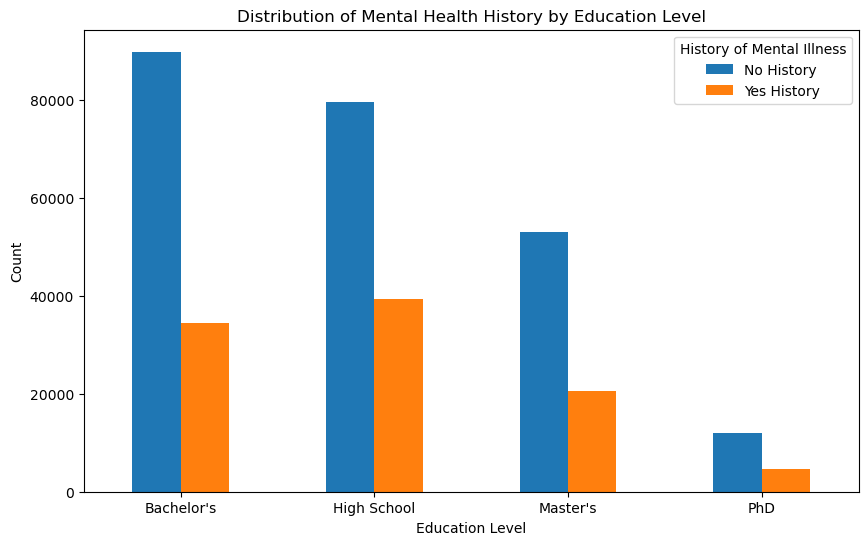

,Percentage Yes History
Education Level,
Bachelor's,27.736087
High School,33.082479
Master's,28.002657
PhD,27.859062


In [131]:
# Step 1: Creating bar charts for education levels and mental health comparison
education_columns = [
    "Education Level_Bachelor's Degree", "Education Level_High School",
    "Education Level_Master's Degree", "Education Level_PhD"
]

# Creating a new column to represent education levels more clearly
education_labels = {
    "Education Level_Bachelor's Degree": "Bachelor's",
    "Education Level_High School": "High School",
    "Education Level_Master's Degree": "Master's",
    "Education Level_PhD": "PhD"
}

# Preparing data for bar charts
education_mental_health_data = []
for col in education_columns:
    total_no = df_2[(df_2[col] == 1) & (df_2["History of Mental Illness"] == 0)].shape[0]
    total_yes = df_2[(df_2[col] == 1) & (df_2["History of Mental Illness"] == 1)].shape[0]
    education_mental_health_data.append((education_labels[col], total_no, total_yes))

# Converting to DataFrame for easier plotting
education_mental_health_df = pd.DataFrame(education_mental_health_data, columns=["Education Level", "No History", "Yes History"])

# Plotting bar charts
education_mental_health_df.set_index("Education Level")[["No History", "Yes History"]].plot(kind='bar', figsize=(10, 6))
plt.title("Distribution of Mental Health History by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="History of Mental Illness")
plt.xticks(rotation=0)
plt.show()

# Step 2: Calculate and analyze percentage of individuals with mental illness across education levels
education_percentage = education_mental_health_df.set_index("Education Level")
education_percentage["Total"] = education_percentage["No History"] + education_percentage["Yes History"]
education_percentage["Percentage Yes History"] = (education_percentage["Yes History"] / education_percentage["Total"]) * 100

# Show calculated percentages
education_percentage[["Percentage Yes History"]]


In [132]:
# List of dummy-encoded education columns
education_columns = [
    "Education Level_Bachelor's Degree", 
    "Education Level_High School",
    "Education Level_Master's Degree", 
    "Education Level_PhD"
]

# Perform chi-square test for each education dummy column
for col in education_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df_3[col], df_3['History of Mental Illness'])
    
    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results
    print(f"Chi-square test for {col}:")
    print(f"  chi2 = {chi2}")
    print(f"  p-value = {p}")
    print('-' * 40)


Chi-square test for Education Level_Bachelor's Degree:
  chi2 = 600.1105276512967
  p-value = 1.5840117276858927e-132
----------------------------------------
Chi-square test for Education Level_High School:
  chi2 = 563.2835391484916
  p-value = 1.6230896902057224e-124
----------------------------------------
Chi-square test for Education Level_Master's Degree:
  chi2 = 245.6158647632834
  p-value = 2.3455999673824736e-55
----------------------------------------
Chi-square test for Education Level_PhD:
  chi2 = 53.517614359181266
  p-value = 2.5628461959804717e-13
----------------------------------------


### Interpretation of the Chi-Square Test Results:

The chi-square tests reveal statistically significant associations between the different education levels and the history of mental illness. Here's the interpretation for each:

1. **Bachelor's Degree**:
   - **chi2 = 600.11**, **p-value ≈ 1.58e-132**: 
     There is a very strong and statistically significant association between having a Bachelor's degree and mental illness. The extremely low p-value suggests that this result is highly unlikely to be due to chance.

2. **High School**:
   - **chi2 = 563.28**, **p-value ≈ 1.62e-124**: 
     Similar to the Bachelor's degree, there is a strong and statistically significant association between high school education and mental illness.

3. **Master's Degree**:
   - **chi2 = 245.62**, **p-value ≈ 2.35e-55**: 
     There is a significant association between having a Master's degree and mental illness, though the strength of this association is lower compared to the Bachelor's and High School levels.

4. **PhD**:
   - **chi2 = 53.52**, **p-value ≈ 2.56e-13**: 
     While still significant, the association between having a PhD and mental illness is much weaker compared to the other education levels.

### Key Insights:
- **All Education Levels Show Significant Associations**: Each education level shows a significant association with mental illness, indicating that education plays a role in mental health outcomes.
- **Stronger Associations for Bachelor's and High School Levels**: The chi-square values for **Bachelor's** and **High School** degrees are much higher, indicating a stronger association between these education levels and the prevalence of mental illness.
- **Weaker Association for PhDs**: The association for individuals with a PhD is present but much weaker compared to the oto specific education levels.

### **Observations on Education Level and Mental Health**
**Bar Chart Analysis**:
   - **High School**: 
     - Individuals with only a high school education show a relatively high count of those with a history of mental illness. This suggests that lower educational attainment might be associated with increased mental health challenges, potentially due to economic stress or limited job opportunities.
   - **Bachelor's Degree**: 
     - There is a significant number of individuals without a history of mental illness among those with a bachelor's degree. However, the group with mental health issues is also notable, which could indicate that while higher education provides opportunities, it might also introduce stressors.
   - **Master's and PhD**:
     - Both groups show lower counts of individuals with mental health histories compared to high school graduates. This could suggest that higher education levels are associated with better mental health, possibly due to better job prospects, financial stability, and access to resources. However, the presence of individuals with mental health issues even at the highest education levels suggests that academic or career pressures might also play a role.

---

Next: let's explore all features  
 'Number of Children',
 'Smoking Status',
 'Physical Activity Level',
 'Employment Status',
 'Inco - DONEme',
 'Alcohol Consumpt ion',
 'Dietary Habits',
 'Sleep Patterns',
 'History of Mental I - TARGETllness',
 'History of Substance Abuse',
 'Family History of Depression',
 'Chronic Medical Conditions',
 'Marital Status_Married',
 'Marital Status_Single',
 'Marital Status_Widowed',
 "Education Level_Bach - DONEelor's Degree",
 'Education Lev - DONEel_High School',
 "Education Level_ - DONEMaster's Degree",
 'Edu - DONEl',
 'Income Group']


---

As observed from the EDA and feature engineering steps, certain features such as Name  columns and those with low variance could be dropped to improve model performance. We will address this further in the next stage of feature engineering, where we will handle redundancies and refine the features for the second round of interactions.

---